# KKBox Churn Prediction

## 1. Understanding business requirements:

### 1.1 KKBox-

KKBox is one of the leading music streaming service, specially for east and south-east asia. KKBox works on two types of memberships, first one is advertisement based and second one is paid membership. By using these two membership policies, a customer will have access to over 30 million asian tracks. Since KKBox knows that retaining customers is much more baneficial as compare to add new customers, so that's why they understood about the customer churn.

More specificially churn means user is going to leave the service, with the higher possibility. And non churn means user will be using the service as usual.


### 1.2 Business Objective-

Here our main goal is to find out the customers with the higher possibility of churn. So that they can provide some of incentives to those users, for not leaving the service.


### 1.3 Constraints-

1. No low latency requirement
2. Some form of interpretability
3. Need to penalize misclassification


### 1.4 Some useful links-

1.https://medium.com/analytics-vidhya/kaggle-top-4-solution-wsdm-kkboxs-churn-prediction-fc49104568d6

2.https://blog.hubspot.com/service/how-to-reduce-customer-churn

3.http://cs229.stanford.edu/proj2017/final-posters/5147439.pdf

4.https://www.researchgate.net/publication/310757545_A_Survey_on_Customer_Churn_Prediction_using_Machine_Learning_Techniques

5.https://blogs.oracle.com/datascience/introduction-to-churn-prediction-in-python

6.http://scholar.google.co.in/scholar_urlurl=https://arxiv.org/pdf/1802.03396&hl=en&sa=X&ei=SPNxX_XkKYiKywTm3oTgDg&scisig=AAGBfm19LyNUh7RBORzEDUYSwYWHfbceiQ&nossl=1&oi=scholarr

7.https://www.youtube.com/watch?v=OEDUzVH1aDI

## 2. Data:

### 2.1 Source-

https://www.kaggle.com/c/kkbox-churn-prediction-challenge/overview


### 2.2 Data Information-

The data typically present in the 4 csv files, 


**2.2.1-** start with **train_v2.csv** which contains just two features:

**msno** - user id 

**is_churn** - target variable, where 1 means churn and 0 means renewable



**2.2.2-** second csv is **transaction_v2.csv** which contains 9 features: 

**msno** - user id

**payment_method_id** - represent payment method

**payment_plan_days** - length of membership plan in days

**plan_list_price** - price in New taiwan dollars

**actual_amount_paid** - the actual amount paid for the plan

**is_auto_renew** - whether users plan activated automatically or not

**transaction_date** - the date in which user performed transactions for updating the plan

**membership_expire_date** - the date in which membership expires

**is_cancel** - whether or not the user canceled the membership in this transaction



**2.2.3-** third csv is **user_logs_v2.csv** which contains 9 features:

**msno** - user id

**date_format** - date

**num_25** - numbers of songs played less than 25% of the song length

**num_50** - numbers of songs played between 25% to 50% of the song length

**num_75** - numbers of songs played between 50% to 75% of of the song length

**num_985** - numbers of songs played between 75% to 98.5% of the song length

**num_100** - numbers of songs played over 98.5% of the song length

**num_unq** -  numbers of unique songs played

**total_secs** - total seconds played



**2.2.4-** fourth csv is **members_v3.csv** which contains 6 features:

**msno** - user id

**city** - city code

**bd** - age(outlier prone)

**gender** - male or female

**registered_via** - registration method

**registration_init_time** - registration date


### 2.3 Performance Metric-

As mentioned by kaggle the major performance metric that we can use is the log loss, because we have to penalize each of the misclassification.

## 3. EDA:
Here just to avoid computational expansiveness I performed EDA on three different datasets, corresponding to the respective given dataset.

### 3.1 Importing important libraries-

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Mostly the data that has given, comes from 4 csv files, one of them is the **train_v2.csv**, which is containing class labels. So I am going to add these labels with each of the csv for analysis.

### 3.2 Analysis on train data-

In [2]:
# reading csv
train_data = pd.read_csv('train_v2.csv')
# getting the head (top 5 rows) of df
train_data.head()

,msno,is_churn
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1


In [3]:
# shape of the dataframe
train_data.shape

(970960, 2)

**The train dataset has 970960 rows and just 2 features(columns).**

In [4]:
# number of class labels
train_data['is_churn'].unique()

array([1, 0])

**There are only two class labels avilable, 0 for non-churn and 1 for churn. So ultimately binary classification.**

In [5]:
# checking for any null(nan) value in the dataframe
train_data.isnull().values.any()

False

**The train dataset has no null values.**

In [6]:
# checking for duplicate value in the dataframe
train_data.duplicated().any()

False

**There are no duplicate values.**

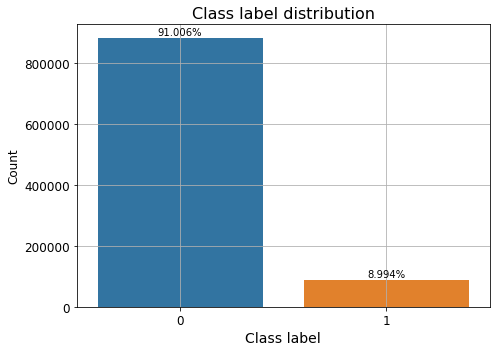

Number of data points in class 1 : 87330 ( 8.994 %)
Number of data points in class 0 : 883630 ( 91.006 %)


In [7]:
# distribution of class labels
# https://stackoverflow.com/questions/63603222/adding-percentages-to-sns-countplot-how-do-i-show-percentages-for-two-values-w

plt.figure(figsize=(7, 5))
ax = sns.countplot(data=train_data, x='is_churn')
plt.xticks(size=12)
plt.xlabel('Class label', size=14)
plt.yticks(size=12)
plt.ylabel('Count', size=12)
plt.title('Class label distribution', size=16)

total = len(train_data)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.3f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.grid()
plt.show()

class_distribution = train_data['is_churn'].value_counts().sort_index()
sorted_yi = np.argsort(class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i , ':',class_distribution.values[i], '(', np.round((class_distribution.values[i]/train_data.shape[0]*100), 3), '%)')

**By looking at this analysis, there is a clear picture that the dataset is highly imbalanced. Because there are a lot of non-churned users as compare to churned users.**

## EDA 1

### 3.3 Analysis on members data-

In [8]:
# reading csv
members_data = pd.read_csv('members_v3.csv')
# getting the head (top 5 rows) of df
members_data.head()

,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,20110911
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,20110915
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,20110915
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915


In [9]:
# shape of the members dataframe
members_data.shape

(6769473, 6)

**The members dataset has 6769473 rows and 6 features(columns).**

In [10]:
# merging train dataset with members dataset
train_members = pd.merge(train_data, members_data, on='msno', how='left')
# getting the head (top 5 rows) of df
train_members.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,20131223.0
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,13.0,20.0,male,3.0,20131223.0
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,13.0,18.0,male,3.0,20131227.0
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1.0,0.0,NaN,7.0,20140109.0
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,13.0,35.0,female,7.0,20140125.0


In [11]:
# shape of the members dataframe
train_members.shape

(970960, 7)

**The train member dataset has 970960 rows and 7 features(6 columns and a class label).**

In [12]:
# getting basic information about the dataframe
train_members.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 970960 entries, 0 to 970959
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   msno                    970960 non-null  object 
 1   is_churn                970960 non-null  int64  
 2   city                    860967 non-null  float64
 3   bd                      860967 non-null  float64
 4   gender                  388905 non-null  object 
 5   registered_via          860967 non-null  float64
 6   registration_init_time  860967 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 59.3+ MB


**Observations: -**

1. 'gender' is a object type of feature.
2. Rest of the features except msno, are the numerical features.
3. This dataset contain lot of missing values.

In [13]:
# getting features wise null values (number)
train_members.isnull().sum()

msno                           0
is_churn                       0
city                      109993
bd                        109993
gender                    582055
registered_via            109993
registration_init_time    109993
dtype: int64

**It's better to impute some suitable values instead of nan values. Because here there are a lot of missing values.**

## Univariate Analysis

In [14]:
# to plot count plot with percentage
def count_plot(data, col1, xname, yname, title, fig, col2='is_churn'):
    '''This function is used to plot a count plot, with percentage displayed on top of each bin'''
    
    # https://stackoverflow.com/questions/63603222/adding-percentages-to-sns-countplot-how-do-i-show-percentages-for-two-values-w
    plt.figure(figsize=fig)
    ax = sns.countplot(data=data, x=col1, hue=col2, hue_order=[0, 1])
    plt.xticks(size=12)
    plt.xlabel(xname, size=14)
    plt.yticks(size=12)
    plt.ylabel(yname, size=12)
    plt.title(title, size=16)
    
    total = len(data)
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center', size=12)
    plt.tight_layout()
    plt.grid()
    plt.show()

In [15]:
# to get category wise percentage and total churn
def countplot_analysis(data, col1, xname, yname, title, fig, col2='is_churn', top=False):
    '''This function is used to display a table with the total and average churned users'''
    
    # https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    # https://stackoverflow.com/a/19385591/4084039
    temp['total_users'] = pd.DataFrame(data.groupby(col1)[col2].agg(total_users='count')).reset_index()['total_users']
    temp['average_churned_users'] = pd.DataFrame(data.groupby(col1)[col2].agg(average_churned_users='mean')).reset_index()['average_churned_users']
    
    temp.sort_values(by=['total_users'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    count_plot(data, col1, xname, yname, title, fig, col2)
    print(temp)

In [16]:
# countplot without percentage
def countplot1_analysis(data, col1, xname, yname, title, fig, col2='is_churn', top=False):
    '''This function is used to plot count plot and then total and average of the churned users'''
    
    # https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    # https://stackoverflow.com/a/19385591/4084039
    temp['total_users'] = pd.DataFrame(data.groupby(col1)[col2].agg(total_users='count')).reset_index()['total_users']
    temp['average_churned_users'] = pd.DataFrame(data.groupby(col1)[col2].agg(average_churned_users='mean')).reset_index()['average_churned_users']
    
    temp.sort_values(by=['total_users'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    plt.figure(figsize=fig)
    sns.countplot(x=col1, data=data, hue=col2)
    plt.title(title)
    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.grid()
    plt.show()
    print(temp)

In [17]:
# to get boxplot
def boxplot(data, col2, xname, yname, title, col1='is_churn'):
    '''This function is used to plot the boxplot'''
    
    sns.boxplot(x=col1, y=col2, data=data)
    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.title(title)
    plt.show()

### 3.3.1 Members dataset (city)-

In [18]:
# number of unique city codes
print(train_members['city'].unique())
print(len(train_members['city'].unique()))

[ 5. 13.  1. 22.  9. 12.  6. 14.  4. nan 15. 18.  3. 21.  8.  7. 17. 11.
 10. 20. 16. 19.]
22


**There are 22 unique city codes, including nan.**

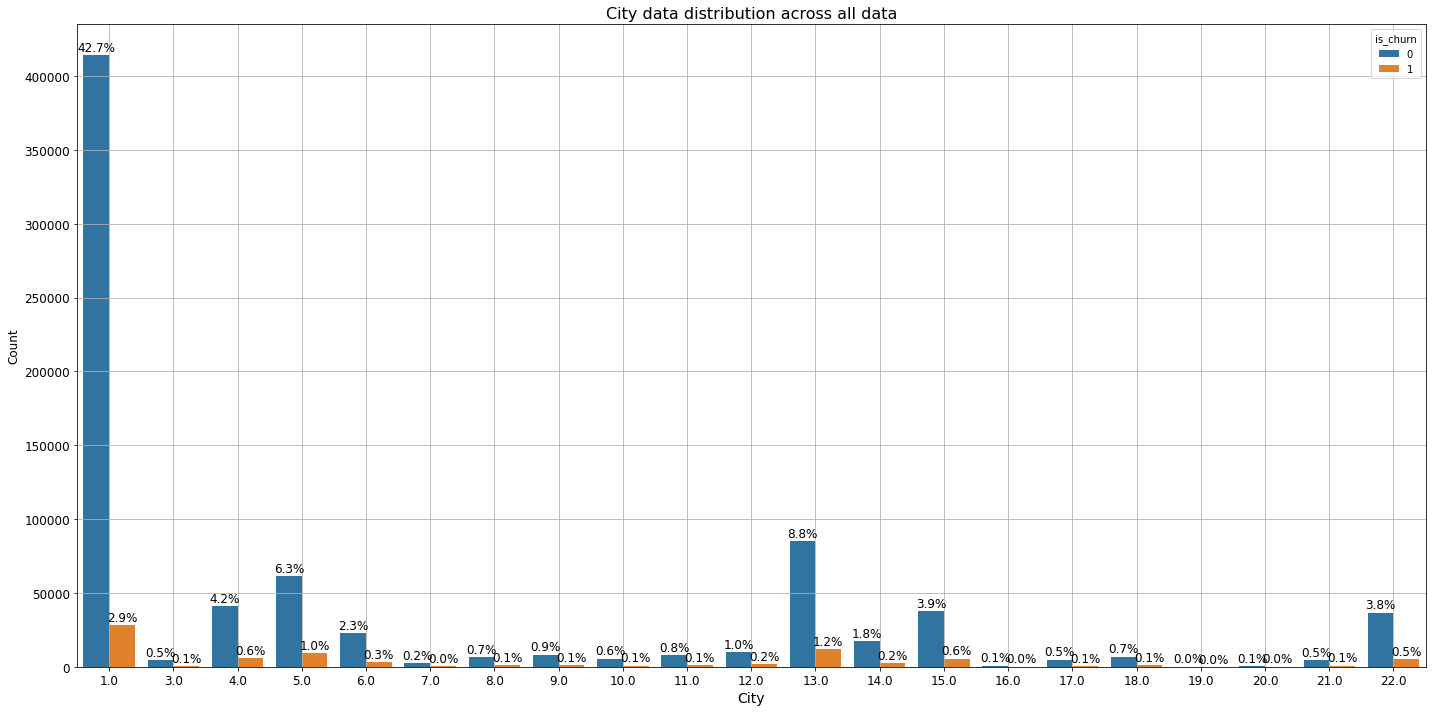

    city  is_churn  total_users  average_churned_users
0    1.0     28351       442598               0.064056
11  13.0     11950        97136               0.123023
3    5.0      9333        70706               0.131997
2    4.0      6094        47227               0.129036
13  15.0      5538        43187               0.128233
20  22.0      5284        41991               0.125836
4    6.0      3358        26066               0.128827
12  14.0      2370        20013               0.118423
10  12.0      1585        11383               0.139243
7    9.0      1200         9526               0.125971
9   11.0      1096         9138               0.119939
16  18.0       913         7792               0.117171
6    8.0      1021         7589               0.134537
8   10.0       858         6470               0.132612
15  17.0       571         5476               0.104273
19  21.0       765         5199               0.147144
1    3.0       672         5057               0.132885
5    7.0  

In [19]:
countplot_analysis(train_members, 'city', 'City', 'Count', 'City data distribution across all data', (20, 10),'is_churn', False)

**Observations: -**
 
1. There are a lot of users(almost 45%) from the city with the code 1, but in terms of average churned users for this city is less, as compare to other cities.
2. City code 21 contain the highest churning rate as compare to other cities, which is 14.71%
3. Average churning rate lie in between 10% to 14.7% except for the city 1, which is having average churning rate of 6.4%

**It's always good to fill some suitable values in place of nan. Since there is no city code with the value '0', so I can fill those nan values with 0 at data preprocessing.**

### 3.3.2 Members dataset (bd)-

In [20]:
# number of unique bd's
x = train_members['bd'].unique()
x = ['{:f}'.format(item) for item in x]
print(x)
print(len(x))

['28.000000', '20.000000', '18.000000', '0.000000', '35.000000', '21.000000', '32.000000', '29.000000', '38.000000', '49.000000', '24.000000', '17.000000', 'nan', '31.000000', '22.000000', '30.000000', '23.000000', '19.000000', '36.000000', '26.000000', '40.000000', '34.000000', '41.000000', '25.000000', '27.000000', '44.000000', '33.000000', '37.000000', '16.000000', '43.000000', '42.000000', '48.000000', '39.000000', '54.000000', '55.000000', '46.000000', '52.000000', '15.000000', '14.000000', '61.000000', '51.000000', '47.000000', '53.000000', '60.000000', '67.000000', '45.000000', '63.000000', '105.000000', '57.000000', '50.000000', '117.000000', '59.000000', '64.000000', '72.000000', '58.000000', '70.000000', '321.000000', '106.000000', '12.000000', '62.000000', '74.000000', '97.000000', '65.000000', '110.000000', '2.000000', '112.000000', '66.000000', '80.000000', '5.000000', '91.000000', '13.000000', '71.000000', '102.000000', '56.000000', '10.000000', '1037.000000', '68.000000'

**Observations: -**
    
1. There are 232 different bd(age) values.
2. As we knows it's age, and by looking at the values there are lot of outliers.

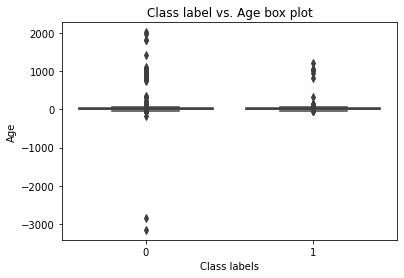

In [21]:
# boxplot
boxplot(train_members, 'bd', 'Class labels', 'Age', 'Class label vs. Age box plot', col1='is_churn')

**There are a lot of outliers, as already mentioned by KKBox. So it's better to remove outliers first and then analyze this feature.**

**In order to get the idea of age range, I can use percentile approach.**

In [22]:
# getting 0th to 100th percentiles of bd feature
for i in range(0, 110, 10):
    print(i, 'th percentile value is: ', np.nanpercentile(train_members['bd'], i))
print('*' * 50)
print('*' * 50)
# getting 99.1th to 100th percentile to obtain max reasonable age
for i in range(1, 11, 1):
    print(99+(i/10), 'th percentile value is: ', np.nanpercentile(train_members['bd'], 99+(i/10)))

0 th percentile value is:  -3152.0
10 th percentile value is:  0.0
20 th percentile value is:  0.0
30 th percentile value is:  0.0
40 th percentile value is:  0.0
50 th percentile value is:  0.0
60 th percentile value is:  21.0
70 th percentile value is:  25.0
80 th percentile value is:  29.0
90 th percentile value is:  35.0
100 th percentile value is:  2016.0
**************************************************
**************************************************
99.1 th percentile value is:  54.0
99.2 th percentile value is:  54.0
99.3 th percentile value is:  55.0
99.4 th percentile value is:  56.0
99.5 th percentile value is:  57.0
99.6 th percentile value is:  59.0
99.7 th percentile value is:  61.0
99.8 th percentile value is:  64.0
99.9 th percentile value is:  72.0
100.0 th percentile value is:  2016.0


**So the minimum age is 0(although non sensable) and the maximum reasonable age in 72. So I can keep only the age in between 0 and 72, and for rest of the ages I can set them as nan.**

In [23]:
train_members['bd'] = train_members['bd'].apply(lambda x: x if (x < 72.0) and (x > 0.0) else np.nan)

In [24]:
# https://stackoverflow.com/questions/41143707/stacked-plot-to-represent-genders-for-an-age-group-from-csv-containing-identifie
bins = np.arange(1, 10) * 10
train_members['category'] = np.digitize(train_members['bd'], bins, right=True)

**It is giving me 9 different age categories.**

0 --> (0-10)

1 --> (11-20)

2 --> (21-30)

3 --> (31-40)

4 --> (41-50)

5 --> (51-60)

6 --> (61-70)

7 --> (71-80)

9 --> nan

**So in order to plot boxplot I can ignore the ninth category.**

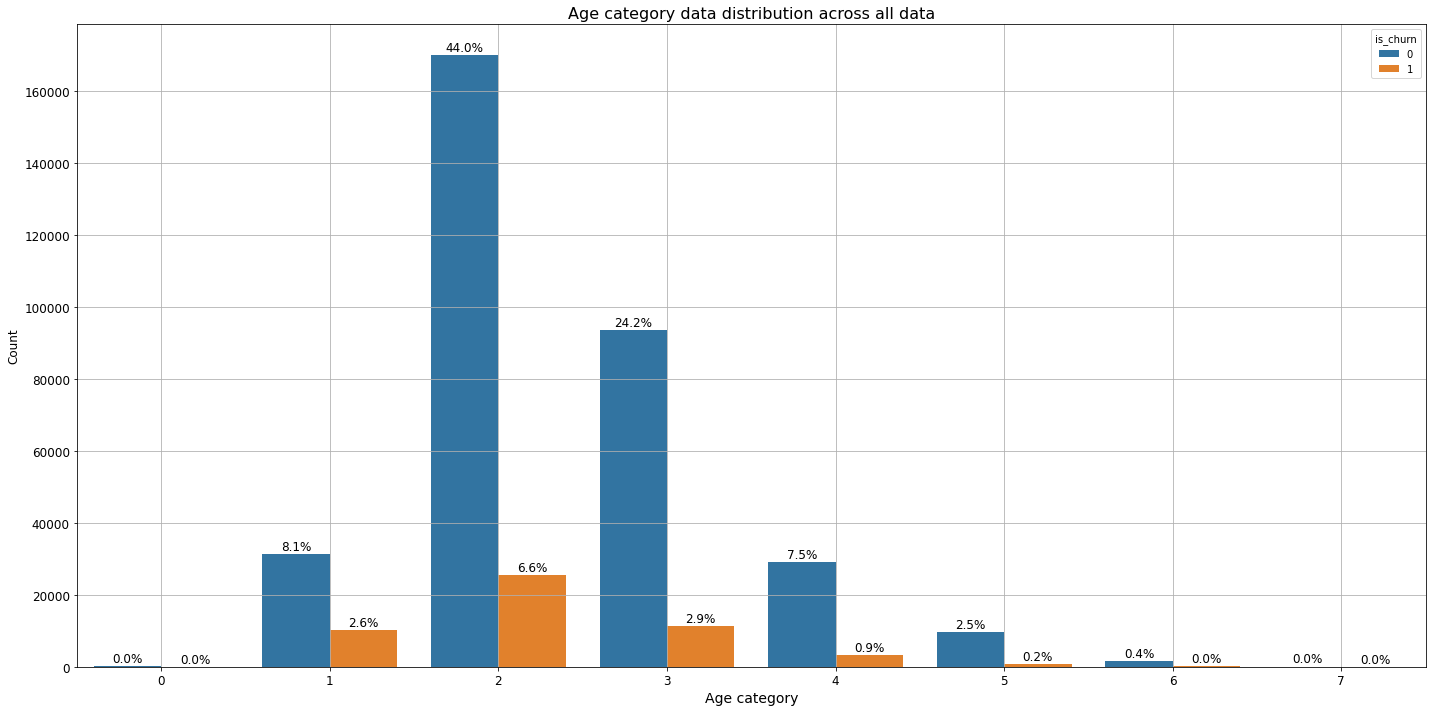

   category  is_churn  total_users  average_churned_users
2         2     25483       195420               0.130401
3         3     11280       104707               0.107729
1         1     10159        41428               0.245221
4         4      3291        32315               0.101841
5         5       857        10429               0.082175
6         6       189         1822               0.103732
0         0        15          114               0.131579
7         7         6           40               0.150000


In [25]:
# count plot
countplot_analysis(train_members[train_members['category'] != 9], 'category', 'Age category', 'Count', 'Age category data distribution across all data', (20, 10),'is_churn', False)

**There are lot of youth and adults(typically from category 1 to 4), and in terms of user churn the youth and adults are highly lookable, because for every category there is more than 10% churning rate.**

**It's better to impute nan values with the median age.**

In [26]:
# getting median age
np.nanmedian(train_members['bd'])

28.0

### 3.3.3 Members dataset (gender)-

In [27]:
# number of unique genders
print(train_members['gender'].unique())
print(len(train_members['gender'].unique()))

['male' nan 'female']
3


**There are 3 unique values for gender feature including nan.**

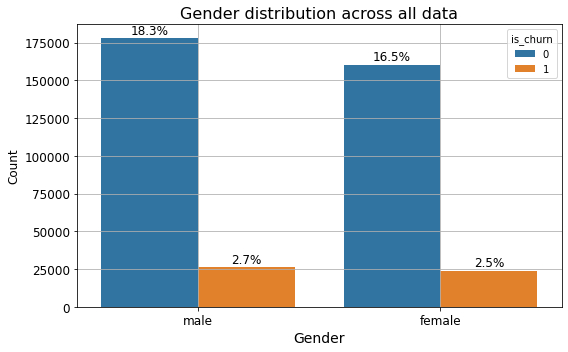

   gender  is_churn  total_users  average_churned_users
1    male     26396       204561               0.129037
0  female     23940       184344               0.129866


In [28]:
# count plot
countplot_analysis(train_members, 'gender', 'Gender', 'Count', 'Gender distribution across all data', (8,5),'is_churn', False)

**Observation: -**
    
1. There are almost 21% user data belong to male, and 19% user data belong to female.
2. So there are 60% missing data.
3. By looking at the average churning rate for both the gender types it is almost same.

**It's good to impute some suitable value instead of nan.**

So what I can do here is, setting male to code '1', setting female to code '2', and setting nan to code '0' at data preprocessing.

### 3.3.4 Members dataset (registered_via)-

In [29]:
# number of unique registration ways
print(train_members['registered_via'].unique())
print(len(train_members['registered_via'].unique()))

[ 3.  7.  9. nan  4. 13.]
6


**So there are 6 unique registration ways to the service, including nan.**

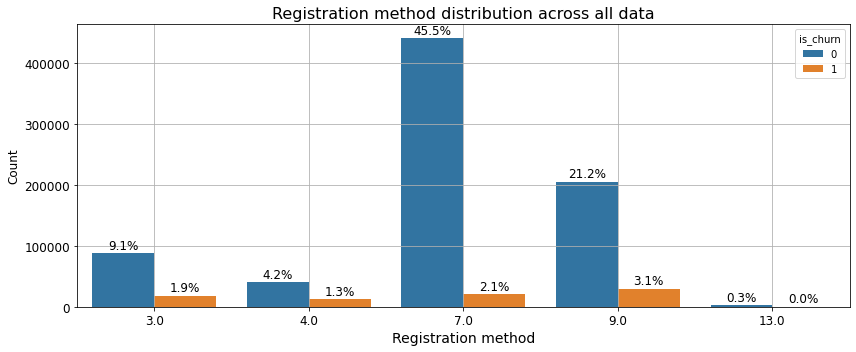

   registered_via  is_churn  total_users  average_churned_users
2             7.0     20697       462684               0.044732
3             9.0     29893       235689               0.126832
0             3.0     18338       106459               0.172254
1             4.0     12185        52744               0.231022
4            13.0       335         3391               0.098791


In [30]:
# count plot
countplot_analysis(train_members, 'registered_via', 'Registration method', 'Count', 'Registration method distribution across all data', (12,5),'is_churn', False)

**Observations: -**
    
1. Almost 48% users uses registration method 7 to enter to the service.
2. The users who entered via registration method 7 has less tendency or churning(althought it is lookable).
3. The users who registered via registration method 4 has major tendency or churning, which is 23% for given data.
4. There are very few peoples who uses registration method 13 to enter to the service.

**Since there is no registration category with the value 0, hence I can impute 0 in place of nan at the data preprocessing.**

### 3.3.5 Members dataset (registration_init_time)-

In [31]:
# converting float date to datetime
train_members['registration_init_time'] = pd.to_datetime(train_members['registration_init_time'], format='%Y%m%d')
# getting head of the feature
train_members['registration_init_time'].head()

0   2013-12-23
1   2013-12-23
2   2013-12-27
3   2014-01-09
4   2014-01-25
Name: registration_init_time, dtype: datetime64[ns]

**It's better if I create a list of year, month and weekday separately, so I can analyse them.**

In [32]:
# adding year feature
train_members['year'] = train_members['registration_init_time'].dt.year.values
# adding month feature
train_members['month'] = train_members['registration_init_time'].dt.month.values
# adding weekday feature
# Reference: https://stackoverflow.com/questions/60214194/error-in-reading-stock-data-datetimeproperties-object-has-no-attribute-week
train_members['weekday'] = train_members['registration_init_time'].dt.day_name().values

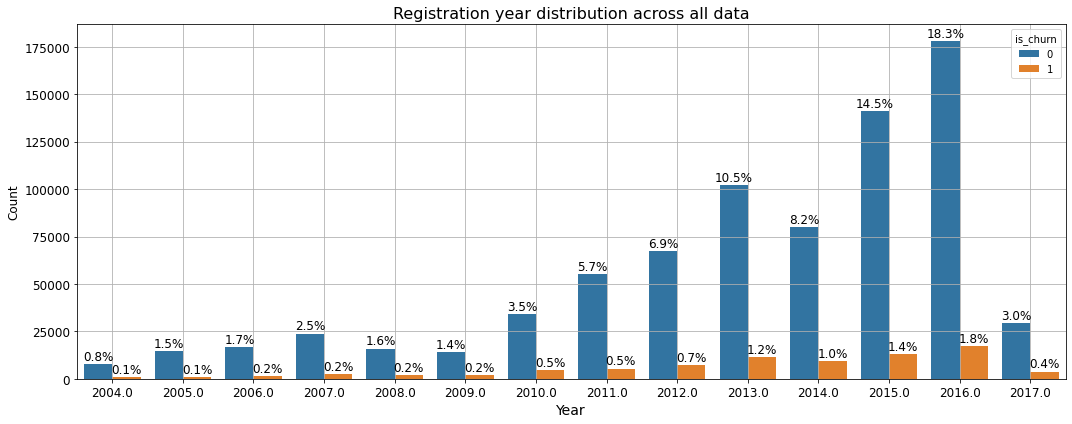

      year  is_churn  total_users  average_churned_users
12  2016.0     17270       195184               0.088481
11  2015.0     13217       154376               0.085616
9   2013.0     11529       113444               0.101627
10  2014.0      9452        89332               0.105808
8   2012.0      7168        74495               0.096221
7   2011.0      5332        60698               0.087845
6   2010.0      4497        38640               0.116382
13  2017.0      3833        33230               0.115348
3   2007.0      2366        26158               0.090450
2   2006.0      1469        18048               0.081394
4   2008.0      1776        17685               0.100424
5   2009.0      1744        15731               0.110864
1   2005.0      1063        15616               0.068071
0   2004.0       732         8330               0.087875


In [33]:
# count plot
countplot_analysis(train_members, 'year', 'Year', 'Count', 'Registration year distribution across all data', (15,6),'is_churn', False)

**There is reasonable number of churned users each year, which is starting from 6% to almost 12%. And the churn rate based on year, doen't not follow increasing pattern usually.** 

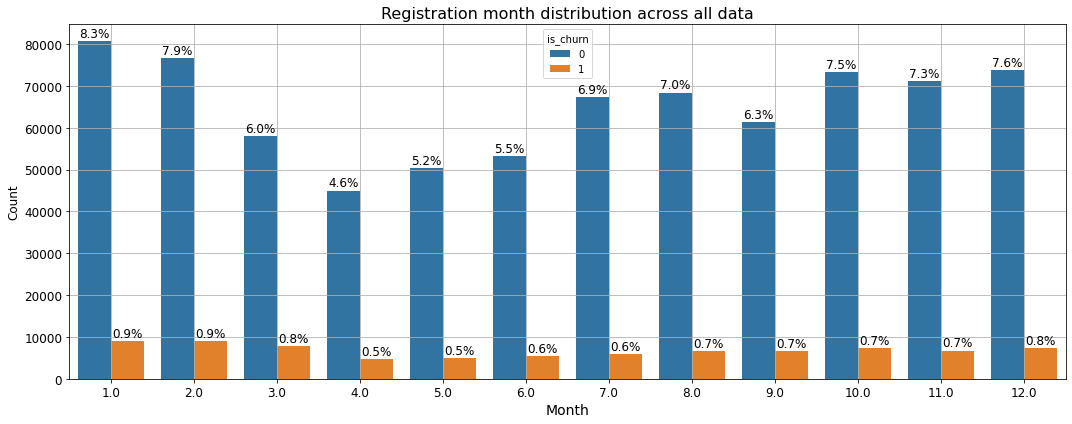

    month  is_churn  total_users  average_churned_users
0     1.0      8949        89640               0.099833
1     2.0      9035        85628               0.105515
11   12.0      7345        81230               0.090422
9    10.0      7260        80528               0.090155
10   11.0      6755        77988               0.086616
7     8.0      6631        75068               0.088333
6     7.0      5843        73204               0.079818
8     9.0      6602        67985               0.097110
2     3.0      7911        65938               0.119976
5     6.0      5364        58582               0.091564
4     5.0      5025        55444               0.090632
3     4.0      4728        49732               0.095070


In [34]:
# count plot
countplot_analysis(train_members, 'month', 'Month', 'Count', 'Registration month distribution across all data', (15,6),'is_churn', False)

**There is also reasonable churning rate month wise also, which is having range from 7% to almost 12%. On the month of january there are highest number of user registration.**

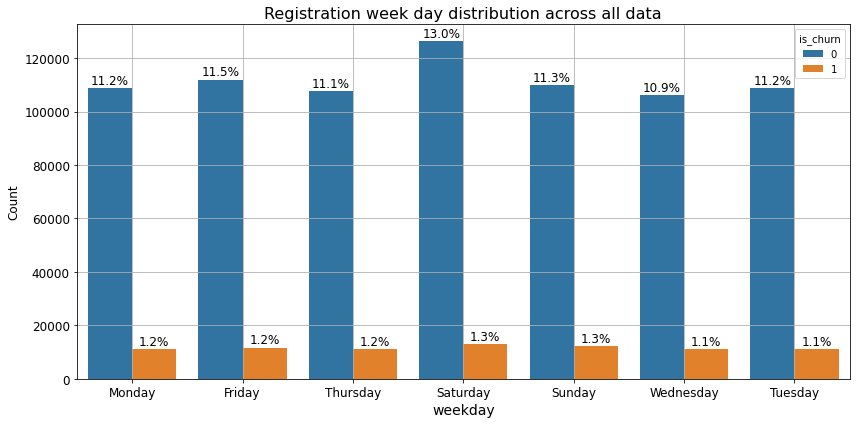

     weekday  is_churn  total_users  average_churned_users
2   Saturday     12969       139268               0.093123
0     Friday     11707       123638               0.094688
3     Sunday     12283       122187               0.100526
1     Monday     11176       119893               0.093216
5    Tuesday     11060       119784               0.092333
4   Thursday     11196       118881               0.094178
6  Wednesday     11057       117316               0.094250


In [35]:
# count plot
countplot_analysis(train_members, 'weekday', 'weekday', 'Count', 'Registration week day distribution across all data', (12,6),'is_churn', False)

**Here for the weekdays, the average churning rate having the range in between 9% to 10%. Most importantly on Saturday there are highest number of registration.**

**Getting median date in order to impute missing values at data preprocessing.**

In [36]:
# getting median date
# https://stackoverflow.com/questions/43889611/median-of-panda-datetime64-column
dates = list(train_members.sort_values('registration_init_time')['registration_init_time'])
print(dates[len(dates)//2])

2015-02-04 00:00:00


## Bi-variate Analysis

**Since there are only 5 features, so best way to perform bi-variate analysis is Pair plot. Here I am removing registration date and gender feature.**

Text(0.5, 1.01, 'Bi-variate analysis across all features')

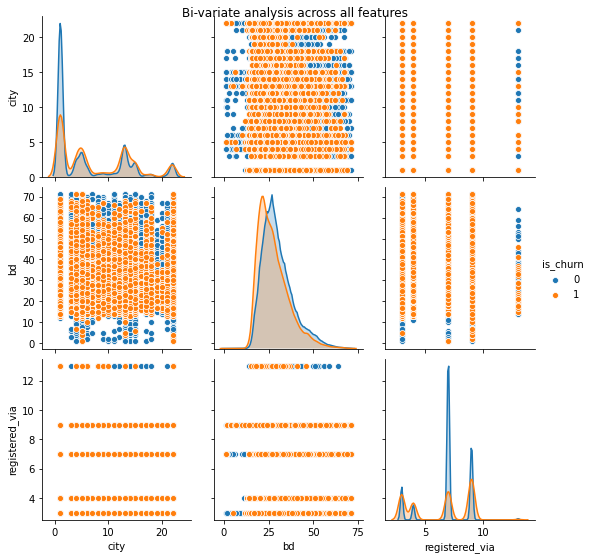

In [38]:
# pair plot
g = sns.pairplot(train_members, vars=['city', 'bd', 'registered_via'], hue='is_churn')
g.fig.suptitle('Bi-variate analysis across all features', y=1.01)

**Observation: -**
    
1. There are no two features, which can easily separate churned users with non-churned users.
2. So we can use these features for feature engineering, because uni-variate analysis looks good.

## EDA 2

### 3.4 Analysis on transactions data-

In [39]:
# reading csv
transactions_data = pd.read_csv('transactions_v2.csv')
# getting the head (top 5 rows) of df
transactions_data.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,32,90,298,298,0,20170131,20170504,0
1,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,30,149,149,1,20150809,20190412,0
2,+/GXNtXWQVfKrEDqYAzcSw2xSPYMKWNj22m+5XkVQZc=,36,30,180,180,1,20170303,20170422,0
3,+/w1UrZwyka4C9oNH3+Q8fUf3fD8R3EwWrx57ODIsqk=,36,30,180,180,1,20170329,20170331,1
4,+00PGzKTYqtnb65mPKPyeHXcZEwqiEzktpQksaaSC3c=,41,30,99,99,1,20170323,20170423,0


In [40]:
# shape of the dataframe
transactions_data.shape

(1431009, 9)

**The members dataset has 1431009 rows and 9 features(columns).**

In [41]:
# merging train dataset with transactions dataset
train_transactions = pd.merge(train_data, transactions_data, on='msno', how='left')
# getting the head (top 5 rows) of df
train_transactions.head()

,msno,is_churn,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,36.0,30.0,180.0,180.0,0.0,20170311.0,20170411.0,0.0
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,17.0,60.0,0.0,0.0,0.0,20170311.0,20170314.0,0.0
3,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,15.0,90.0,300.0,300.0,0.0,20170314.0,20170615.0,0.0
4,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,41.0,30.0,149.0,149.0,1.0,20150908.0,20170608.0,0.0


In [42]:
# shape of the dataframe
train_transactions.shape

(1169418, 10)

**The train member dataset has 1169418 rows and 10 features(9 columns and a class label).**

In [43]:
# getting basic information about the dataframe
train_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1169418 entries, 0 to 1169417
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   msno                    1169418 non-null  object 
 1   is_churn                1169418 non-null  int64  
 2   payment_method_id       1132036 non-null  float64
 3   payment_plan_days       1132036 non-null  float64
 4   plan_list_price         1132036 non-null  float64
 5   actual_amount_paid      1132036 non-null  float64
 6   is_auto_renew           1132036 non-null  float64
 7   transaction_date        1132036 non-null  float64
 8   membership_expire_date  1132036 non-null  float64
 9   is_cancel               1132036 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 98.1+ MB


**Observations: -**
    
1. All the features are the float features.
2. There are some null values present in each of the merged features.

In [44]:
# checking for duplicate values
train_transactions.duplicated().any()

False

**There are no duplicate rows/observations.**

In [45]:
# getting features wise null values (number)
train_transactions.isnull().sum()

msno                          0
is_churn                      0
payment_method_id         37382
payment_plan_days         37382
plan_list_price           37382
actual_amount_paid        37382
is_auto_renew             37382
transaction_date          37382
membership_expire_date    37382
is_cancel                 37382
dtype: int64

**It's better to impute some suitable values instead of nan values. Because here there are a reasonable number of missing values.**

## Univariate Analysis

### 3.4.1 Transactions dataset (payment_method_id)-

In [46]:
# number of unique payment_method
print(train_transactions['payment_method_id'].unique())
print(len(train_transactions['payment_method_id'].unique()))

[nan 36. 17. 15. 41. 40. 38. 32. 33. 35. 39. 37. 20. 30. 29. 16. 19. 13.
 22. 34. 28. 10. 31. 26. 27. 21. 12. 18. 23. 11.  3. 14.  6.  8.]
34


**So there are 34 unique payment methods available, including nan.**

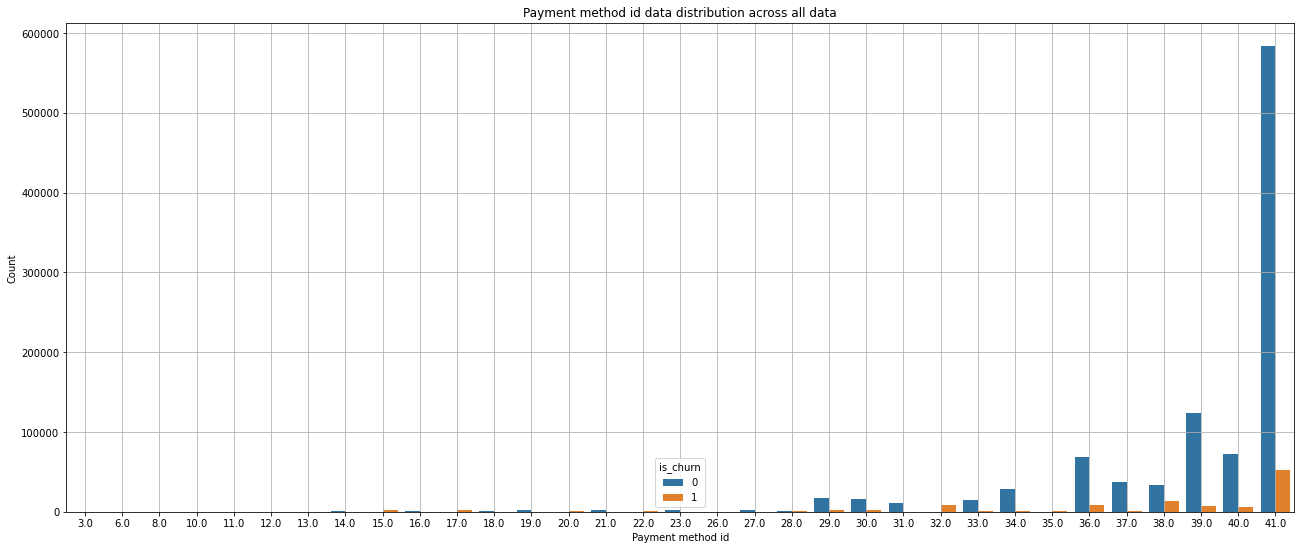

    payment_method_id  is_churn  total_users  average_churned_users
32               41.0     52481       636230               0.082487
30               39.0      7609       131672               0.057788
31               40.0      5908        77817               0.075922
27               36.0      8046        76543               0.105117
29               38.0     13788        47420               0.290763
28               37.0      1421        38224               0.037176
25               34.0      1175        30088               0.039052
20               29.0      2630        19501               0.134865
21               30.0      2526        18017               0.140201
24               33.0       810        15961               0.050749
22               31.0       279        11034               0.025285
23               32.0      8300         8609               0.964107
8                15.0      2701         3001               0.900033
16               23.0       148         2612    

In [47]:
# count plot
countplot1_analysis(train_transactions, 'payment_method_id', 'Payment method id', 'Count', 'Payment method id data distribution across all data', (22, 9),'is_churn', False)

**Observations: -**
    
1. There are a lot of users(almost 54%) who used 41th payment method. And also good number of users uses payment method 36, 39 and 40.
2. There are very bad churning rate for the payment method 3 and 6, hence all users churned.
3. For the payment method 8, 12, 13, 22, 35, 20, 17, 15, 32 there is also high churning rate.
4. It possibly represent that these payment methods are not good.

**Since there are some missing values and also '0' is not a category, so I can impute 0 in place of nan at data preprocessing.**

### 3.4.2 Transactions dataset (payment_plan_days)-

In [48]:
# number of unique payment plan days
print(train_transactions['payment_plan_days'].unique())
print(len(train_transactions['payment_plan_days'].unique()))

[ nan  30.  60.  90. 410. 180. 120.   7. 195. 360. 240. 100. 365.  70.
   0.   1. 200. 400. 395.  80.  10. 230. 450.   3. 415.  14. 110. 270.
  31.  21.  35.]
31


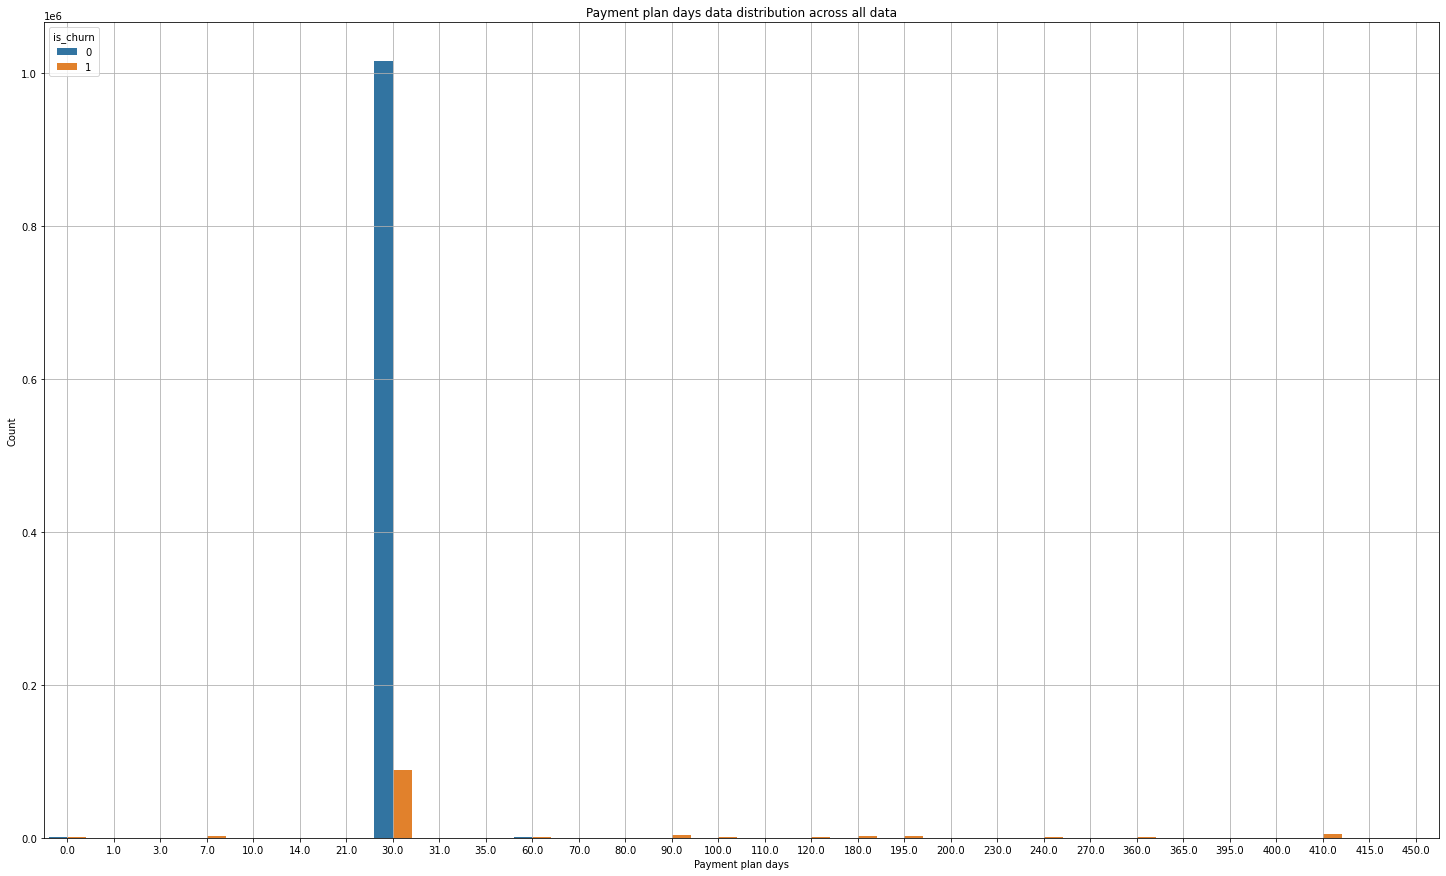

    payment_plan_days  is_churn  total_users  average_churned_users
7                30.0     89157      1104946               0.080689
27              410.0      4628         4680               0.988889
13               90.0      3645         3911               0.931987
18              195.0      3008         3030               0.992739
17              180.0      2971         2995               0.991987
3                 7.0      2661         2876               0.925243
0                 0.0       538         1914               0.281087
10               60.0      1279         1812               0.705850
21              240.0      1449         1481               0.978393
23              360.0      1225         1243               0.985519
16              120.0       790          808               0.977723
14              100.0       655          659               0.993930
4                10.0       351          361               0.972299
25              395.0       293          293    

In [49]:
# count plot
countplot1_analysis(train_transactions, 'payment_plan_days', 'Payment plan days', 'Count', 'Payment plan days data distribution across all data', (25, 15),'is_churn', False)

**Almost a million of users(94.5%) purchased 30 days subsription, while only fewer and fewer users purchased rest of the plans. And beside 30 days plan, the users who purchased another plan have very high tendency to leave the service.**

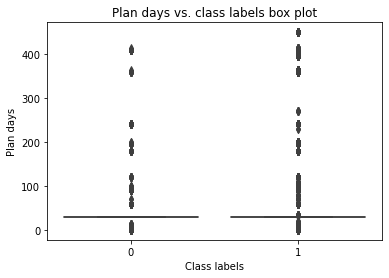

In [50]:
# boxplot
boxplot(train_transactions, 'payment_plan_days', 'Class labels', 'Plan days', 'Plan days vs. class labels box plot', col1='is_churn')

**It seems like there are a lot of outlier values, so it's better to get a range and set all the values beside this range to nan, and then after fill those nan using median value.**

In [51]:
# getting 0th to 100th percentiles of plan days feature
for i in range(0, 110, 10):
    print(i, 'th percentile value is: ', np.nanpercentile(train_transactions['payment_plan_days'], i))
print('*' * 50)
print('*' * 50)
# getting 90th to 100th percentiles of plan days feature
for i in range(90, 101, 1):
    print(i, 'th percentile value is: ', np.nanpercentile(train_transactions['payment_plan_days'], i))

0 th percentile value is:  0.0
10 th percentile value is:  30.0
20 th percentile value is:  30.0
30 th percentile value is:  30.0
40 th percentile value is:  30.0
50 th percentile value is:  30.0
60 th percentile value is:  30.0
70 th percentile value is:  30.0
80 th percentile value is:  30.0
90 th percentile value is:  30.0
100 th percentile value is:  450.0
**************************************************
**************************************************
90 th percentile value is:  30.0
91 th percentile value is:  30.0
92 th percentile value is:  30.0
93 th percentile value is:  30.0
94 th percentile value is:  30.0
95 th percentile value is:  30.0
96 th percentile value is:  30.0
97 th percentile value is:  30.0
98 th percentile value is:  30.0
99 th percentile value is:  195.0
100 th percentile value is:  450.0


**So the minimum plan days I can take is 0 and maximum is 30, beyond this range I can set everything as nan.**

In [52]:
# setting everything to nan beyond the range(0-30)
train_transactions['payment_plan_days'] = train_transactions['payment_plan_days'].apply(lambda x: x if (x <= 30.0) else np.nan)

**Getting median so that I can impute value in place of nan.**

In [53]:
# getting median
np.nanmedian(train_transactions['payment_plan_days'])

30.0

### 3.4.3 Transactions dataset (plan_list_price)-

In [54]:
# number of unique plan list price
x = train_transactions['plan_list_price'].unique()
x = ['{:f}'.format(item) for item in x]
print(x)
print(len(x))

['nan', '180.000000', '0.000000', '300.000000', '149.000000', '99.000000', '1788.000000', '477.000000', '298.000000', '536.000000', '600.000000', '894.000000', '100.000000', '129.000000', '1200.000000', '447.000000', '480.000000', '350.000000', '1299.000000', '930.000000', '150.000000', '1599.000000', '799.000000', '119.000000', '120.000000', '400.000000', '35.000000', '1150.000000', '450.000000', '1000.000000', '500.000000', '70.000000', '2000.000000', '1.000000', '1399.000000', '134.000000', '699.000000', '126.000000', '210.000000', '596.000000', '105.000000', '131.000000', '265.000000', '143.000000']
44


**There are 44 unique plan prices are present including nan and 0.**

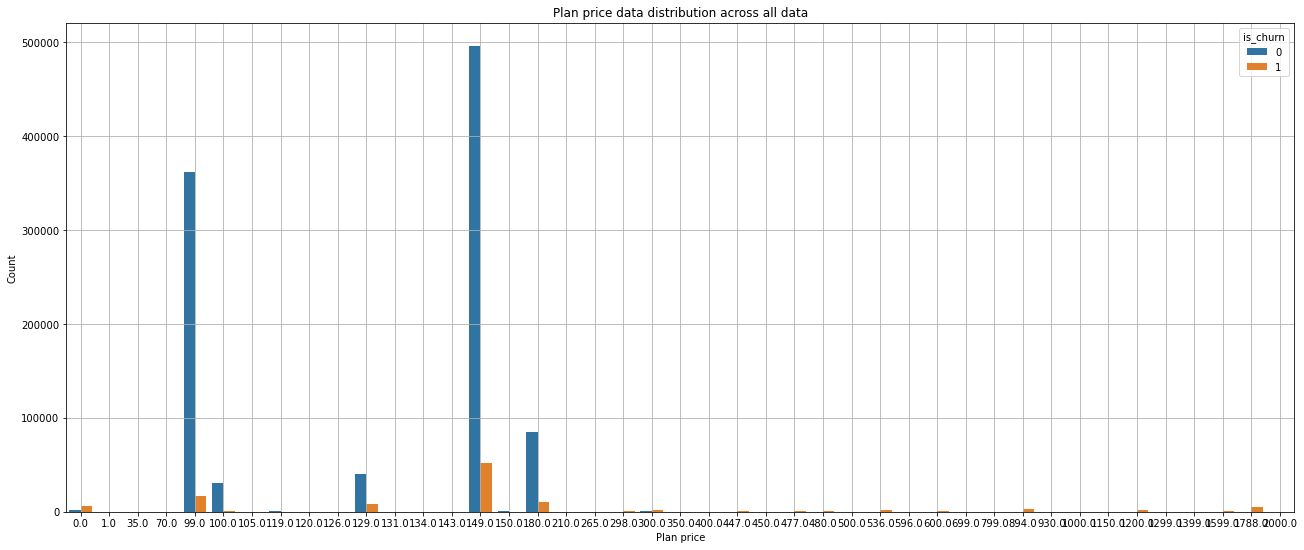

    plan_list_price  is_churn  total_users  average_churned_users
14            149.0     52084       548040               0.095037
4              99.0     16922       378667               0.044688
16            180.0     10542        95909               0.109917
10            129.0      7898        47696               0.165590
5             100.0       978        31927               0.030632
0               0.0      5781         7599               0.760758
41           1788.0      4673         4723               0.989414
33            894.0      3006         3028               0.992734
28            536.0      2350         2370               0.991561
20            300.0      1421         2002               0.709790
37           1200.0      1953         1980               0.986364
15            150.0       302         1598               0.188986
25            477.0      1136         1148               0.989547
30            600.0       793          797               0.994981
23        

In [55]:
# count plot
countplot1_analysis(train_transactions, 'plan_list_price', 'Plan price', 'Count', 'Plan price data distribution across all data', (22, 9),'is_churn', False)

**Observations: -**
    
1. Lots of users(almost 94.25%) have their plan price, like 99, 100, 129, 149, 180 NTD.
2. The users having plan price 129, and 180 have more tendency of churing(which is greater than 10%).
3. The users having plan price 149 have also high tendency of churnining.
4. Beside these five values if a user purchased any other plan then there is very high tendency of churning.

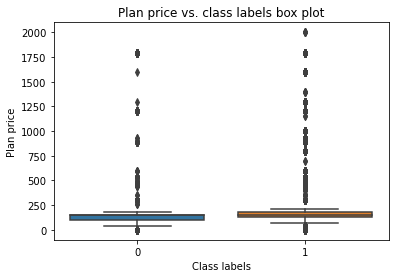

In [56]:
# boxplot
boxplot(train_transactions, 'plan_list_price', 'Class labels', 'Plan price', 'Plan price vs. class labels box plot', col1='is_churn')

**Again it is also containing several outliers, so it's better to get the range of min and max value for plan price.**

In [57]:
# getting 0th to 100th percentiles of plan days feature
for i in range(0, 110, 10):
    print(i, 'th percentile value is: ', np.nanpercentile(train_transactions['plan_list_price'], i))
print('*' * 50)
print('*' * 50)
# getting 90th to 100th percentiles of plan days feature
for i in range(90, 101, 1):
    print(i, 'th percentile value is: ', np.nanpercentile(train_transactions['plan_list_price'], i))

0 th percentile value is:  0.0
10 th percentile value is:  99.0
20 th percentile value is:  99.0
30 th percentile value is:  99.0
40 th percentile value is:  129.0
50 th percentile value is:  149.0
60 th percentile value is:  149.0
70 th percentile value is:  149.0
80 th percentile value is:  149.0
90 th percentile value is:  180.0
100 th percentile value is:  2000.0
**************************************************
**************************************************
90 th percentile value is:  180.0
91 th percentile value is:  180.0
92 th percentile value is:  180.0
93 th percentile value is:  180.0
94 th percentile value is:  180.0
95 th percentile value is:  180.0
96 th percentile value is:  180.0
97 th percentile value is:  180.0
98 th percentile value is:  180.0
99 th percentile value is:  600.0
100 th percentile value is:  2000.0


**So minimum value that I got is 0(first month user or users who want to see ads) and the maximum value is 180. So beyond this I can set everything to nan.**

In [58]:
# setting everything to nan beyond range(0-180)
train_transactions['plan_list_price'] = train_transactions['plan_list_price'].apply(lambda x: x if (x <= 180.0) else np.nan)

**Getting median so that I can impute value in place of nan.**

In [59]:
# getting median
np.nanmedian(train_transactions['plan_list_price'])

149.0

### 3.4.4 Transactions dataset (actual_amount_paid)-

In [60]:
# number of unique actual plan list price
x = train_transactions['actual_amount_paid'].unique()
x = ['{:f}'.format(item) for item in x]
print(x)
print(len(x))

['nan', '180.000000', '0.000000', '300.000000', '149.000000', '99.000000', '1788.000000', '477.000000', '298.000000', '536.000000', '600.000000', '894.000000', '100.000000', '129.000000', '1200.000000', '447.000000', '480.000000', '350.000000', '1299.000000', '930.000000', '150.000000', '1599.000000', '799.000000', '119.000000', '400.000000', '35.000000', '1150.000000', '450.000000', '120.000000', '1000.000000', '500.000000', '70.000000', '2000.000000', '1.000000', '1399.000000', '134.000000', '699.000000', '127.000000', '210.000000', '596.000000', '105.000000', '131.000000', '265.000000', '143.000000']
44


**There are 44 unique plan prices are present including nan and 0.**

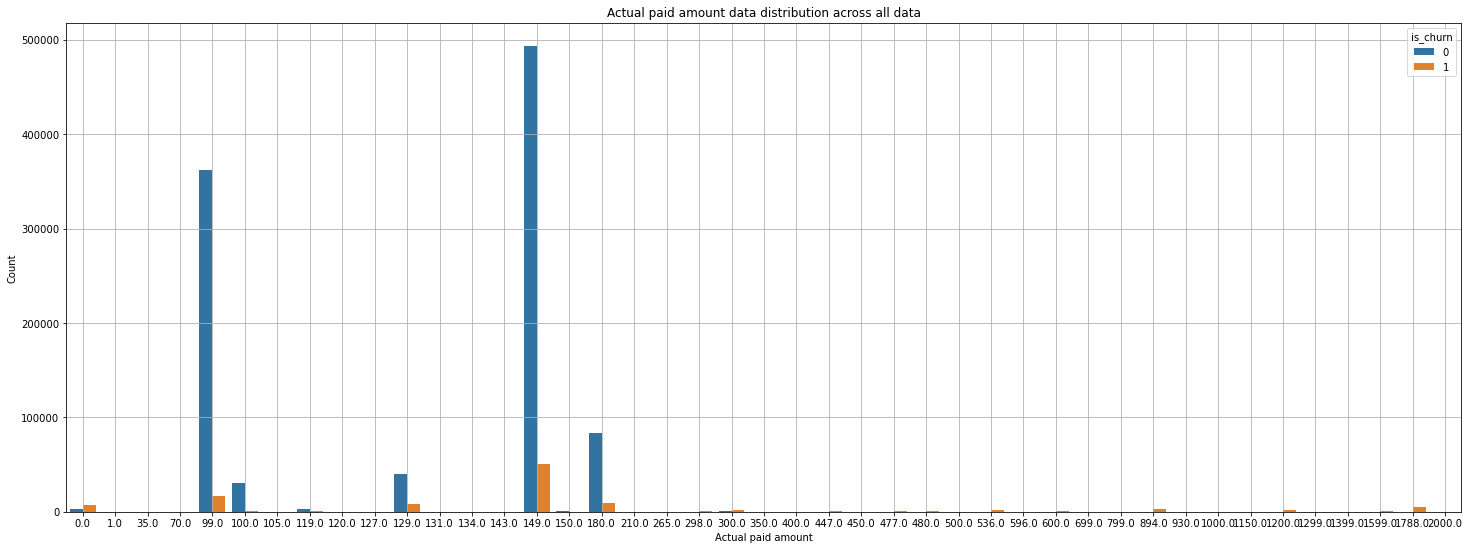

    actual_amount_paid  is_churn  total_users  average_churned_users
14               149.0     50832       544412               0.093370
4                 99.0     16957       379426               0.044691
16               180.0      9373        92785               0.101018
10               129.0      7940        48093               0.165097
5                100.0       979        31941               0.030650
0                  0.0      7189         9823               0.731854
41              1788.0      4673         4723               0.989414
7                119.0      1081         3888               0.278035
33               894.0      3006         3028               0.992734
28               536.0      2350         2370               0.991561
20               300.0      1421         2002               0.709790
37              1200.0      1953         1980               0.986364
15               150.0       302         1597               0.189105
25               477.0      1136  

In [61]:
# count plot
countplot1_analysis(train_transactions, 'actual_amount_paid', 'Actual paid amount', 'Count', 'Actual paid amount data distribution across all data', (25, 9),'is_churn', False)

**The distribution and churning rate looks very similar to the plan price, it may possible that with the subtle difference.**

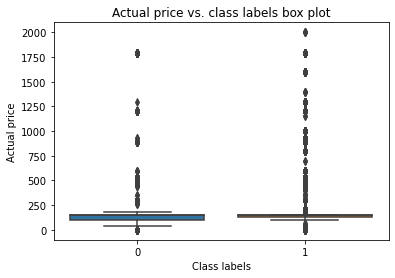

In [62]:
# boxplot
boxplot(train_transactions, 'actual_amount_paid', 'Class labels', 'Actual price', 'Actual price vs. class labels box plot', col1='is_churn')

**Again it is also containing several outliers, so it's better to get the range of min and max value for plan price.**

In [63]:
# getting 0th to 100th percentiles of plan days feature
for i in range(0, 110, 10):
    print(i, 'th percentile value is: ', np.nanpercentile(train_transactions['actual_amount_paid'], i))
print('*' * 50)
print('*' * 50)
# getting 90th to 100th percentiles of plan days feature
for i in range(90, 101, 1):
    print(i, 'th percentile value is: ', np.nanpercentile(train_transactions['actual_amount_paid'], i))

0 th percentile value is:  0.0
10 th percentile value is:  99.0
20 th percentile value is:  99.0
30 th percentile value is:  99.0
40 th percentile value is:  129.0
50 th percentile value is:  149.0
60 th percentile value is:  149.0
70 th percentile value is:  149.0
80 th percentile value is:  149.0
90 th percentile value is:  150.0
100 th percentile value is:  2000.0
**************************************************
**************************************************
90 th percentile value is:  150.0
91 th percentile value is:  180.0
92 th percentile value is:  180.0
93 th percentile value is:  180.0
94 th percentile value is:  180.0
95 th percentile value is:  180.0
96 th percentile value is:  180.0
97 th percentile value is:  180.0
98 th percentile value is:  180.0
99 th percentile value is:  600.0
100 th percentile value is:  2000.0


**So again 0 for min and 180 for max, and setting everything beyond this to nan.**

In [64]:
# setting everything to nan beyond range(0-180)
train_transactions['actual_amount_paid'] = train_transactions['actual_amount_paid'].apply(lambda x: x if (x <= 180.0) else np.nan)

**Getting median so that I can impute value in place of nan.**

In [65]:
# getting median
np.nanmedian(train_transactions['actual_amount_paid'])

149.0

### 3.4.5 Transactions dataset (is_auto_renew)-

In [66]:
# number of unique auto renew codes
print(train_transactions['is_auto_renew'].unique())
print(len(train_transactions['is_auto_renew'].unique()))

[nan  0.  1.]
3


**There are 3 unique auto renew codes, including nan. Since 2 is not present as a auto renew code, So I can replace all the nan with 2 at data preprocessing. Which typically means that "not mentioned".**

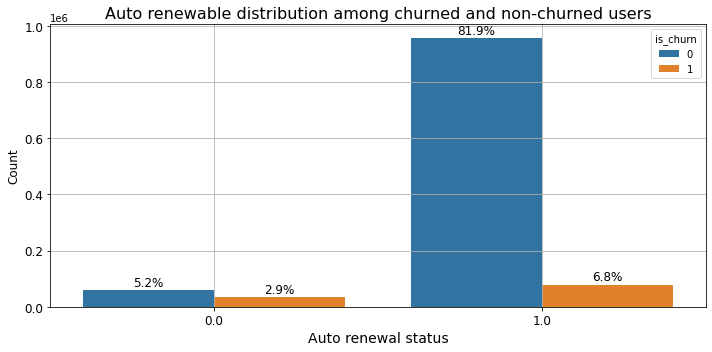

   is_auto_renew  is_churn  total_users  average_churned_users
1            1.0     79399      1037286               0.076545
0            0.0     34174        94750               0.360675


In [67]:
# countplot
countplot_analysis(train_transactions, 'is_auto_renew', 'Auto renewal status', 'Count', 'Auto renewable distribution among churned and non-churned users', (10,5), col2='is_churn', top=False)

**Observations: -**
    
1. There are a lot of users(almost 89%) who setted up their account for auto renew of a plan.
2. While there are only fewer users who hasn't setted up their account for auto renew of a plan, and among 36% of them churned.

**In order to impute missing value I can add one more category with the value 2.**

### 3.4.6 Transactions dataset (transaction_date)-

In [68]:
# converting float date to datetime
train_transactions['transaction_date'] = pd.to_datetime(train_transactions['transaction_date'], format='%Y%m%d')
# getting head of the feature
train_transactions['transaction_date'].head()

0          NaT
1   2017-03-11
2   2017-03-11
3   2017-03-14
4   2015-09-08
Name: transaction_date, dtype: datetime64[ns]

In [69]:
# adding year to df
train_transactions['year'] = train_transactions['transaction_date'].dt.year.values
# adding month to df
train_transactions['month'] = train_transactions['transaction_date'].dt.month.values

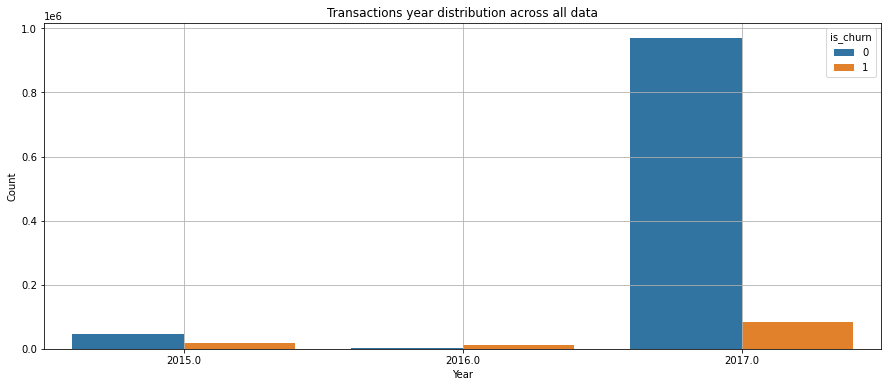

     year  is_churn  total_users  average_churned_users
2  2017.0     83410      1052889               0.079220
0  2015.0     18726        65821               0.284499
1  2016.0     11437        13326               0.858247


In [70]:
# count plot
countplot1_analysis(train_transactions, 'year', 'Year', 'Count', 'Transactions year distribution across all data', (15,6),'is_churn', False)

**It's clear that lot of data(almost 90%) comes from the year 2017. And rest of the transaction dates belong to 2015 and 2016. For the transaction dates 2015 and 2016 there is very high churning rate.**

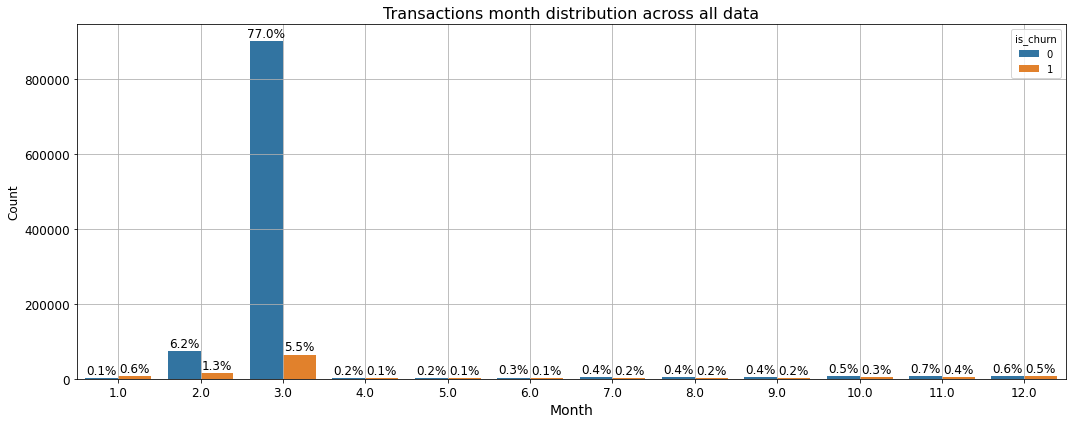

    month  is_churn  total_users  average_churned_users
2     3.0     64728       964972               0.067078
1     2.0     14896        87810               0.169639
11   12.0      6258        13328               0.469538
10   11.0      4485        12320               0.364042
9    10.0      3671        10022               0.366294
0     1.0      7138         8838               0.807649
8     9.0      2874         8014               0.358622
7     8.0      2631         7352               0.357862
6     7.0      2751         6844               0.401958
5     6.0      1678         5036               0.333201
4     5.0      1386         4186               0.331104
3     4.0      1077         3314               0.324985


In [71]:
# count plot
countplot_analysis(train_transactions, 'month', 'Month', 'Count', 'Transactions month distribution across all data', (15,6),'is_churn', False)

**It's obvious because KKBox already mentioned that train data comes for the month of march 2017. So except march there is a very high churning rate.**

**Getting median transaction date for the data to impute in place of nan values.**

In [72]:
# getting median
# https://stackoverflow.com/questions/43889611/median-of-panda-datetime64-column
dates = list(train_transactions.sort_values('transaction_date')['transaction_date'])
print(dates[len(dates)//2])

2017-03-16 00:00:00


### 3.4.7 Transactions dataset (membership_expire_date)-

In [73]:
# converting float date to datetime
train_transactions['membership_expire_date'] = pd.to_datetime(train_transactions['membership_expire_date'], format='%Y%m%d')
# getting head of the feature
train_transactions['membership_expire_date'].head()

0          NaT
1   2017-04-11
2   2017-03-14
3   2017-06-15
4   2017-06-08
Name: membership_expire_date, dtype: datetime64[ns]

In [74]:
# adding year to df
train_transactions['ex_year'] = train_transactions['membership_expire_date'].dt.year.values
# adding month to df
train_transactions['ex_month'] = train_transactions['membership_expire_date'].dt.month.values

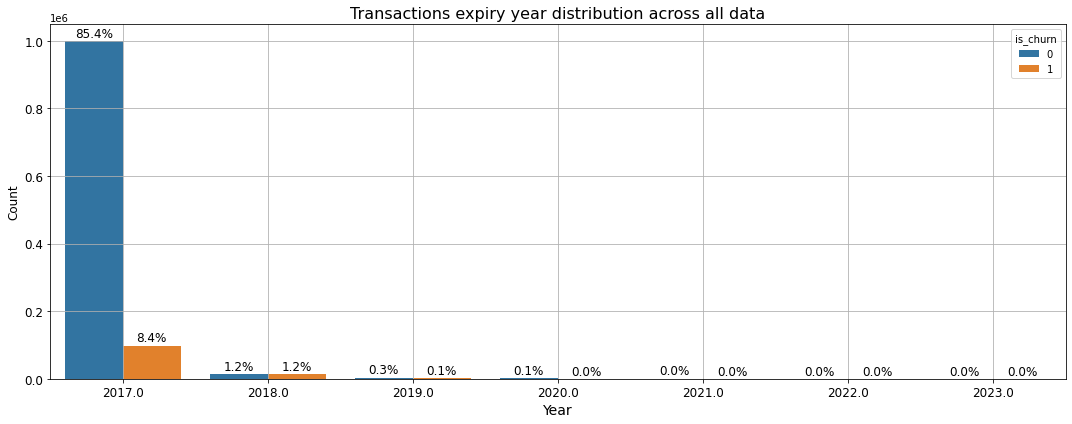

   ex_year  is_churn  total_users  average_churned_users
0   2017.0     98410      1097358               0.089679
1   2018.0     13556        27884               0.486157
2   2019.0      1262         4959               0.254487
3   2020.0       260         1349               0.192735
4   2021.0        64          382               0.167539
5   2022.0        20           85               0.235294
6   2023.0         1           19               0.052632


In [75]:
# count plot
countplot_analysis(train_transactions, 'ex_year', 'Year', 'Count', 'Transactions expiry year distribution across all data', (15,6),'is_churn', False)

**Lots of users(almost 94%) whos transactions expires on 2017. And there are some other years also avialable, but it seems like the users who purchased long duration plans has higher chances of churn.**

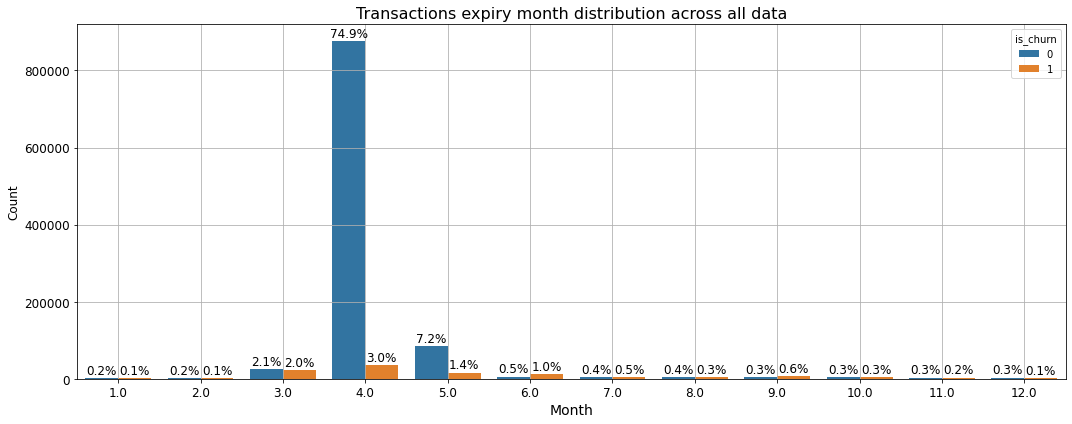

    ex_month  is_churn  total_users  average_churned_users
3        4.0     35546       911224               0.039009
4        5.0     15864        99891               0.158813
2        3.0     23105        47600               0.485399
5        6.0     11669        17470               0.667945
8        9.0      7186        11145               0.644773
6        7.0      5363        10467               0.512372
7        8.0      3703         8217               0.450651
9       10.0      3908         7622               0.512726
10      11.0      2872         6184               0.464424
11      12.0      1677         4609               0.363853
0        1.0      1463         4180               0.350000
1        2.0      1217         3427               0.355121


In [76]:
# count plot
countplot_analysis(train_transactions, 'ex_month', 'Month', 'Count', 'Transactions expiry month distribution across all data', (15,6),'is_churn', False)

**There are almost 78% users have their subscription expire on the month of April. with quite less number of churn(3.9%).**

**Getting median date for imputing in place of nan dates.**

In [77]:
# getting median
# https://stackoverflow.com/questions/43889611/median-of-panda-datetime64-column
dates = list(train_transactions.sort_values('membership_expire_date')['membership_expire_date'])
print(dates[len(dates)//2])

2017-04-19 00:00:00


### 3.4.8 Transactions dataset (is_cancel)-

In [78]:
# number of unique city codes
print(train_transactions['is_cancel'].unique())
print(len(train_transactions['is_cancel'].unique()))

[nan  0.  1.]
3


**There are 3 unique is_cancel codes, including nan. Since 2 is not present as a auto renew code, So I can replace all the nan with 2. Which typically means that "not mentioned" at data preprocessing.**

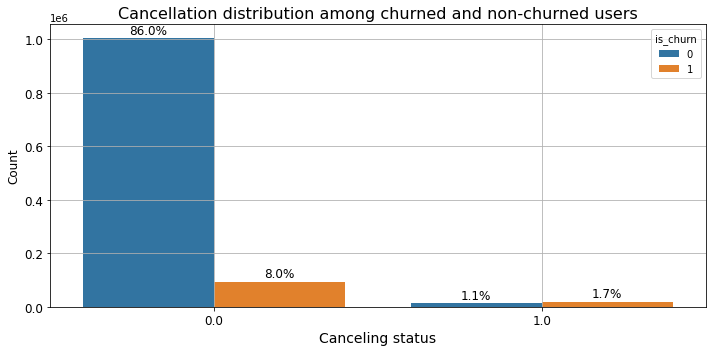

   is_cancel  is_churn  total_users  average_churned_users
0        0.0     93983      1099153               0.085505
1        1.0     19590        32883               0.595749


In [79]:
# count plot
countplot_analysis(train_transactions, 'is_cancel', 'Canceling status', 'Count', 'Cancellation distribution among churned and non-churned users', (10,5), col2='is_churn', top=False)

**Observations: -**
    
1. There are a lot of users(94%) who didn't cancel their subscription, and also among all those users 8% churned.
2. But the users who cancel their subscription, have very high tendency of churning.

## Bi-variate Analysis

**Since there are only 8 features, so best way to perform bi-variate analysis is Pair plot. But here I am plotting pair plot for 6 feautes after extracting two date features.**

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.01, 'Bi-variate analysis across all features')

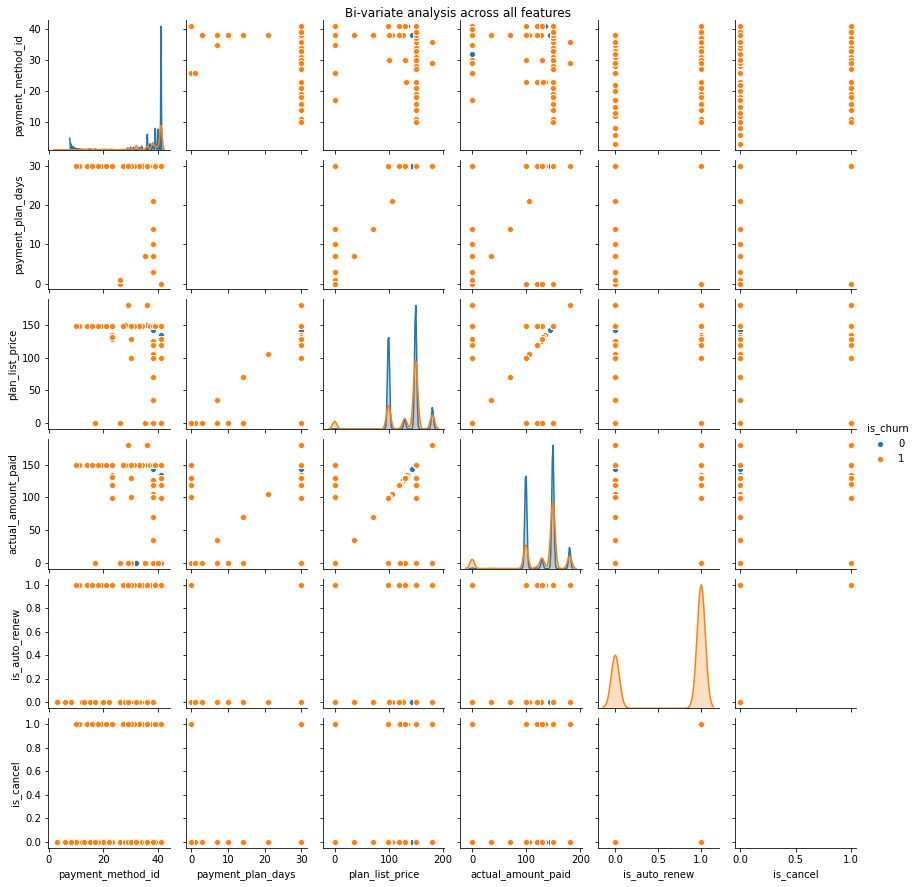

In [80]:
# pair plot
g = sns.pairplot(train_transactions, vars=['payment_method_id', 'payment_plan_days', 'plan_list_price', 'actual_amount_paid', 'is_auto_renew', 'is_cancel'], height=2, hue='is_churn')
g.fig.suptitle('Bi-variate analysis across all features', y=1.01)

**Observation: -**

1. There are no two features, which can easily separate churned users with non-churned users.
2. So we can use these features for feature engineering, because uni-variate analysis looks good.

## EDA 3

In [81]:
# reading csv
logs_data = pd.read_csv('user_logs_v2.csv')
# getting the head (top 5 rows) of df
logs_data.head()

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,u9E91QDTvHLq6NXjEaWv8u4QIqhrHk72kE+w31Gnhdg=,20170331,8,4,0,1,21,18,6309.273
1,nTeWW/eOZA/UHKdD5L7DEqKKFTjaAj3ALLPoAWsU8n0=,20170330,2,2,1,0,9,11,2390.699
2,2UqkWXwZbIjs03dHLU9KHJNNEvEkZVzm69f3jCS+uLI=,20170331,52,3,5,3,84,110,23203.337
3,ycwLc+m2O0a85jSLALtr941AaZt9ai8Qwlg9n0Nql5U=,20170331,176,4,2,2,19,191,7100.454
4,EGcbTofOSOkMmQyN1NMLxHEXJ1yV3t/JdhGwQ9wXjnI=,20170331,2,1,0,1,112,93,28401.558


In [82]:
# shape of the dataframe
logs_data.shape

(18396362, 9)

**The user logs dataset has 18396362 rows and 9 features(columns). It is having large number of observations, because it represent user behaviour day by day.**

In [83]:
# merging train dataset with transactions dataset
train_logs = pd.merge(train_data, logs_data, on='msno', how='left')
# getting the head (top 5) rows of df
train_logs.head()

,msno,is_churn,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,20170305.0,7.0,0.0,3.0,5.0,71.0,68.0,17599.893
1,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,20170301.0,138.0,19.0,7.0,1.0,21.0,158.0,8830.433
2,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,20170319.0,0.0,0.0,0.0,0.0,34.0,17.0,7883.313
3,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,20170316.0,15.0,0.0,0.0,1.0,38.0,17.0,9029.227
4,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,20170310.0,0.0,0.0,0.0,0.0,8.0,8.0,1870.110


In [84]:
# shape of the dataframe
train_logs.shape

(13749353, 10)

**The train logs dataset has 13749353 rows and 10 features(9 columns and a class label).**

In [85]:
# getting basic information about the dataframe
train_logs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13749353 entries, 0 to 13749352
Data columns (total 10 columns):
 #   Column      Dtype  
---  ------      -----  
 0   msno        object 
 1   is_churn    int64  
 2   date        float64
 3   num_25      float64
 4   num_50      float64
 5   num_75      float64
 6   num_985     float64
 7   num_100     float64
 8   num_unq     float64
 9   total_secs  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.1+ GB


**All of the features are float features.**

In [86]:
# checking for duplicate values
train_logs.duplicated().any()

False

**There are no duplicate rows/observations.**

In [87]:
# getting features wise null values (number)
train_logs.isnull().sum()

msno               0
is_churn           0
date          216409
num_25        216409
num_50        216409
num_75        216409
num_985       216409
num_100       216409
num_unq       216409
total_secs    216409
dtype: int64

**There are reasonable number of null values in each of the column.**

## Univariate Analysis

### 3.6.1 User logs dataset (date)-

In [88]:
# converting float date to datetime
train_logs['date'] = pd.to_datetime(train_logs['date'], format='%Y%m%d')
# getting head of the feature
train_logs['date'].head()

0   2017-03-05
1   2017-03-01
2   2017-03-19
3   2017-03-16
4   2017-03-10
Name: date, dtype: datetime64[ns]

**Since most of the data belong to march 2017, so I can analyze it on the day and weekday basis.**

In [89]:
# adding day to df
train_logs['day'] = train_logs['date'].dt.day.values
# adding weekday to df
# Reference: https://stackoverflow.com/questions/60214194/error-in-reading-stock-data-datetimeproperties-object-has-no-attribute-week
train_logs['weekday'] = train_logs['date'].dt.day_name().values

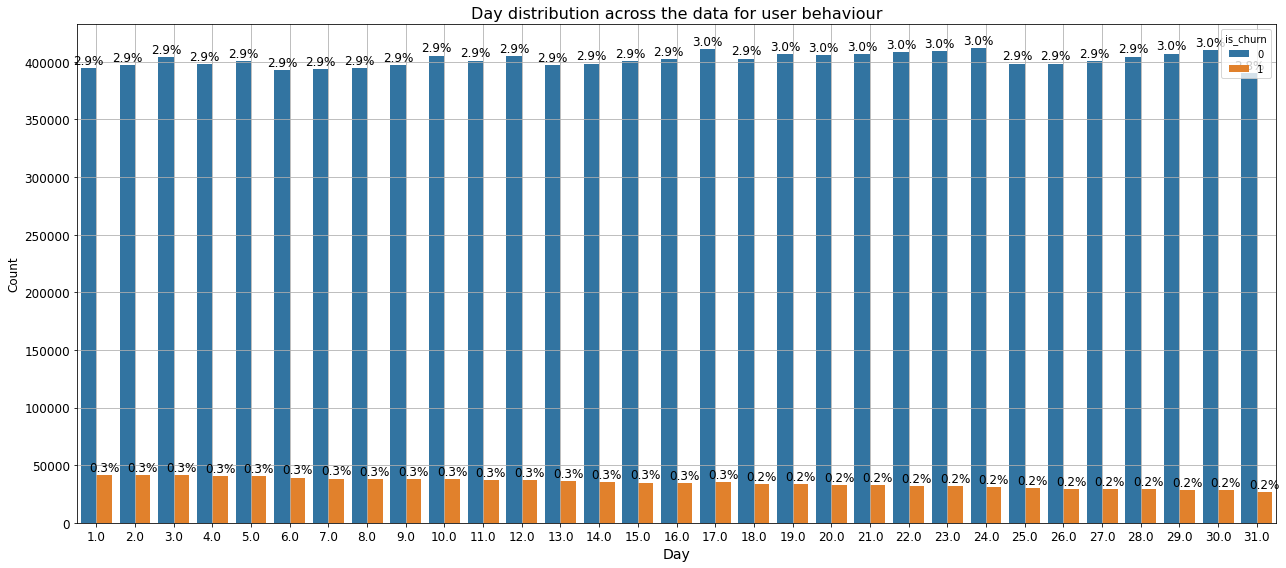

     day  is_churn  total_users  average_churned_users
16  17.0     35028       446342               0.078478
2    3.0     41604       445568               0.093373
9   10.0     37966       443487               0.085608
23  24.0     31232       443150               0.070477
11  12.0     36994       441680               0.083757
4    5.0     40448       441299               0.091657
22  23.0     31678       441196               0.071800
21  22.0     32146       440319               0.073006
18  19.0     33551       440074               0.076239
20  21.0     32577       439348               0.074149
19  20.0     32948       439081               0.075039
29  30.0     28428       438972               0.064760
1    2.0     41475       438937               0.094490
3    4.0     40649       438886               0.092619
10  11.0     37074       438174               0.084610
15  16.0     34772       437370               0.079502
17  18.0     33731       436618               0.077255
0    1.0  

In [90]:
# count plot
countplot_analysis(train_logs, 'day', 'Day', 'Count', 'Day distribution across the data for user behaviour', (18,8),'is_churn', False)

**The distribution looks very similar for all the days, in fact churn user distribution also looks same for all days.**

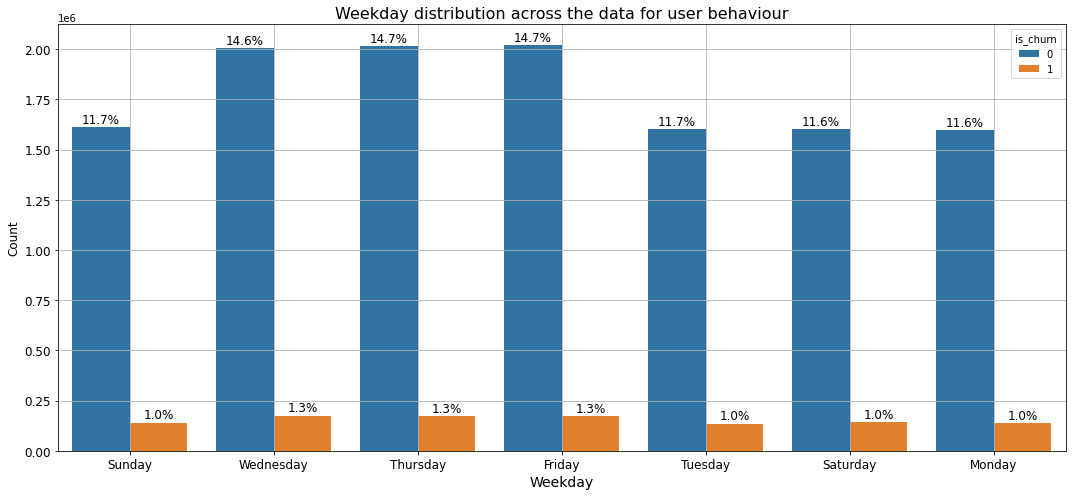

     weekday  is_churn  total_users  average_churned_users
0     Friday    172441      2195372               0.078548
4   Thursday    174287      2191393               0.079533
6  Wednesday    175363      2180295               0.080431
3     Sunday    140491      1751077               0.080231
2   Saturday    141279      1741941               0.081104
5    Tuesday    135434      1738753               0.077891
1     Monday    137183      1734113               0.079108


In [91]:
# count plot
countplot_analysis(train_logs, 'weekday', 'Weekday', 'Count', 'Weekday distribution across the data for user behaviour', (15,7),'is_churn', False)

**There is larger data available for the weekdays wednesday, thursday and friday with churning rate 1.3% for all.**

In [92]:
# getting median
# https://stackoverflow.com/questions/43889611/median-of-panda-datetime64-column
dates = list(train_logs.sort_values('date')['date'])
print(dates[len(dates)//2])

2017-03-16 00:00:00


### 3.6.2 User logs dataset (num_25)-

In [93]:
# number of track where unique listen time is less than 25 percent
x = train_logs['num_25'].unique()
x = ['{:f}'.format(item) for item in x]
print(x)
print(len(x))

['7.000000', '138.000000', '0.000000', '15.000000', '1.000000', '8.000000', '9.000000', '10.000000', '51.000000', '6.000000', '17.000000', '43.000000', '4.000000', '5.000000', '3.000000', '42.000000', '2.000000', '21.000000', 'nan', '12.000000', '33.000000', '16.000000', '11.000000', '35.000000', '14.000000', '13.000000', '69.000000', '26.000000', '55.000000', '46.000000', '73.000000', '39.000000', '165.000000', '47.000000', '20.000000', '255.000000', '23.000000', '40.000000', '31.000000', '27.000000', '25.000000', '22.000000', '18.000000', '41.000000', '95.000000', '30.000000', '34.000000', '36.000000', '62.000000', '57.000000', '49.000000', '44.000000', '29.000000', '32.000000', '119.000000', '91.000000', '38.000000', '54.000000', '60.000000', '28.000000', '53.000000', '45.000000', '84.000000', '19.000000', '24.000000', '66.000000', '59.000000', '96.000000', '50.000000', '87.000000', '56.000000', '67.000000', '78.000000', '37.000000', '48.000000', '160.000000', '102.000000', '135.000

**So there are 685 unique values, so I cannot simply plot the countplot.**

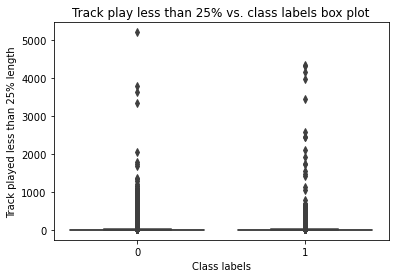

In [94]:
# boxplot
boxplot(train_logs, 'num_25', 'Class labels', 'Track played less than 25% length', 'Track play less than 25% vs. class labels box plot', col1='is_churn')

**There are a lot of outliers present so it's better to get a lower and upper value, so that beyond that limit I can keep them nan.**

In [95]:
# getting 0th to 100th percentiles of track played less than 25% of track length
for i in range(0, 110, 10):
    print(i, 'th percentile value is: ', np.nanpercentile(train_logs['num_25'], i))

0 th percentile value is:  0.0
10 th percentile value is:  0.0
20 th percentile value is:  0.0
30 th percentile value is:  1.0
40 th percentile value is:  1.0
50 th percentile value is:  2.0
60 th percentile value is:  3.0
70 th percentile value is:  5.0
80 th percentile value is:  9.0
90 th percentile value is:  15.0
100 th percentile value is:  5213.0


**So 0 to 15 seems as a good range, so beyond this range I can set all the outliers as nan.**

In [96]:
# setting everything to nan beyond range(0-15)
train_logs['num_25'] = train_logs['num_25'].apply(lambda x: x if (x <= 15.0) else np.nan)

**Getting median for nan imputation**

In [97]:
# getting median
np.nanmedian(train_logs['num_25'])

2.0

### 3.6.3 User logs dataset (num_50)-

In [98]:
# number of track where unique listen time is less than 50 percent
x = train_logs['num_50'].unique()
x = ['{:f}'.format(item) for item in x]
print(x)
print(len(x))

['0.000000', '19.000000', '1.000000', '3.000000', '10.000000', '6.000000', '2.000000', '5.000000', '4.000000', 'nan', '17.000000', '15.000000', '7.000000', '8.000000', '12.000000', '9.000000', '26.000000', '11.000000', '99.000000', '80.000000', '16.000000', '50.000000', '25.000000', '37.000000', '13.000000', '33.000000', '27.000000', '76.000000', '63.000000', '55.000000', '24.000000', '23.000000', '28.000000', '14.000000', '31.000000', '78.000000', '29.000000', '32.000000', '64.000000', '41.000000', '18.000000', '34.000000', '45.000000', '109.000000', '49.000000', '20.000000', '104.000000', '22.000000', '44.000000', '52.000000', '30.000000', '42.000000', '21.000000', '36.000000', '96.000000', '47.000000', '141.000000', '48.000000', '53.000000', '70.000000', '40.000000', '54.000000', '35.000000', '59.000000', '39.000000', '38.000000', '51.000000', '57.000000', '115.000000', '92.000000', '73.000000', '43.000000', '46.000000', '58.000000', '62.000000', '90.000000', '69.000000', '85.000000

**There are 311 unique values for this feature.**

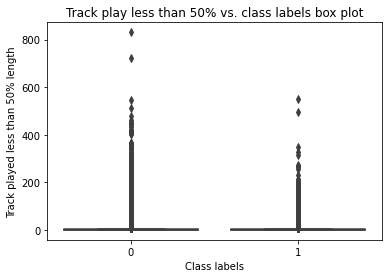

In [99]:
# boxplot
boxplot(train_logs, 'num_50', 'Class labels', 'Track played less than 50% length', 'Track play less than 50% vs. class labels box plot', col1='is_churn')

**Again it seems like there are very few tracks available that user listen till 50% of it's length, and rest of them are outliers.**

In [100]:
# getting 0th to 100th percentiles of track played less than 50% of track length
for i in range(0, 110, 10):
    print(i, 'th percentile value is: ', np.nanpercentile(train_logs['num_50'], i))

0 th percentile value is:  0.0
10 th percentile value is:  0.0
20 th percentile value is:  0.0
30 th percentile value is:  0.0
40 th percentile value is:  0.0
50 th percentile value is:  0.0
60 th percentile value is:  1.0
70 th percentile value is:  1.0
80 th percentile value is:  2.0
90 th percentile value is:  4.0
100 th percentile value is:  831.0


**So 0 to 4 seems as a good range, so beyond this range I can set all the outliers as nan.**

In [101]:
# setting everything to nan beyond limit(0-4)
train_logs['num_50'] = train_logs['num_50'].apply(lambda x: x if (x <= 4.0) else np.nan)

**Getting median for nan imputation.**

In [102]:
# getting median
np.nanmedian(train_logs['num_50'])

0.0

### 3.6.4 User logs dataset (num_75)-

In [103]:
# number of track where unique listen time is less than 75 percent
x = train_logs['num_75'].unique()
x = ['{:f}'.format(item) for item in x]
print(x)
print(len(x))

['3.000000', '7.000000', '0.000000', '1.000000', '4.000000', '2.000000', '5.000000', 'nan', '10.000000', '6.000000', '8.000000', '9.000000', '96.000000', '14.000000', '11.000000', '72.000000', '13.000000', '23.000000', '16.000000', '24.000000', '39.000000', '20.000000', '42.000000', '18.000000', '21.000000', '12.000000', '31.000000', '32.000000', '19.000000', '15.000000', '25.000000', '22.000000', '58.000000', '17.000000', '29.000000', '30.000000', '38.000000', '59.000000', '49.000000', '37.000000', '71.000000', '47.000000', '26.000000', '44.000000', '87.000000', '69.000000', '78.000000', '61.000000', '46.000000', '33.000000', '27.000000', '53.000000', '28.000000', '48.000000', '36.000000', '34.000000', '62.000000', '54.000000', '95.000000', '60.000000', '56.000000', '85.000000', '50.000000', '167.000000', '82.000000', '55.000000', '35.000000', '73.000000', '88.000000', '40.000000', '68.000000', '41.000000', '43.000000', '161.000000', '84.000000', '57.000000', '64.000000', '83.000000',

**So there are 174 unique values present.**

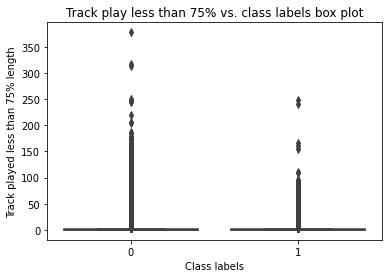

In [104]:
# boxplot
boxplot(train_logs, 'num_75', 'Class labels', 'Track played less than 75% length', 'Track play less than 75% vs. class labels box plot', col1='is_churn')

**Again lot of outliers present, so removing outliers first.**

In [105]:
# getting 0th to 100th percentiles tracks played less than 75% of track length
for i in range(0, 110, 10):
    print(i, 'th percentile value is: ', np.nanpercentile(train_logs['num_75'], i))

0 th percentile value is:  0.0
10 th percentile value is:  0.0
20 th percentile value is:  0.0
30 th percentile value is:  0.0
40 th percentile value is:  0.0
50 th percentile value is:  0.0
60 th percentile value is:  1.0
70 th percentile value is:  1.0
80 th percentile value is:  2.0
90 th percentile value is:  3.0
100 th percentile value is:  378.0


**So 0 to 3 seems as a good range, so beyond this range I can set all the outliers as nan.**

In [106]:
# # setting everything to nan beyond limit(0-3)
train_logs['num_75'] = train_logs['num_75'].apply(lambda x: x if (x <= 3.0) else np.nan)

**Getting median for nan imputation.**

In [107]:
# getting median
np.nanmedian(train_logs['num_75'])

0.0

### 3.3.5 User logs dataset (num_985)-

In [108]:
# number of track where unique listen time is less than 98.5 percent
x = train_logs['num_985'].unique()
x = ['{:f}'.format(item) for item in x]
print(x)
print(len(x))

['5.000000', '1.000000', '0.000000', '3.000000', '7.000000', '2.000000', 'nan', '6.000000', '4.000000', '12.000000', '8.000000', '9.000000', '16.000000', '13.000000', '11.000000', '14.000000', '38.000000', '36.000000', '26.000000', '19.000000', '25.000000', '20.000000', '15.000000', '10.000000', '54.000000', '23.000000', '18.000000', '17.000000', '27.000000', '67.000000', '32.000000', '53.000000', '35.000000', '31.000000', '30.000000', '34.000000', '72.000000', '46.000000', '24.000000', '21.000000', '51.000000', '45.000000', '63.000000', '83.000000', '42.000000', '55.000000', '28.000000', '37.000000', '78.000000', '29.000000', '22.000000', '105.000000', '41.000000', '47.000000', '92.000000', '48.000000', '119.000000', '97.000000', '116.000000', '98.000000', '127.000000', '87.000000', '144.000000', '131.000000', '33.000000', '68.000000', '66.000000', '62.000000', '56.000000', '106.000000', '314.000000', '238.000000', '89.000000', '49.000000', '52.000000', '76.000000', '122.000000', '79.

**There are 287 different unique values for this features.**

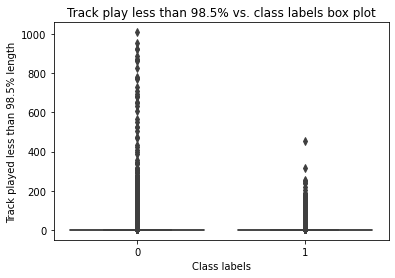

In [109]:
# boxplot
boxplot(train_logs, 'num_985', 'Class labels', 'Track played less than 98.5% length', 'Track play less than 98.5% vs. class labels box plot', col1='is_churn')

**Again lot of outliers present, so removing outliers first.**

In [110]:
# getting 0th to 100th percentiles of tracks played less than 50% of track length
for i in range(0, 110, 10):
    print(i, 'th percentile value is: ', np.nanpercentile(train_logs['num_985'], i))

0 th percentile value is:  0.0
10 th percentile value is:  0.0
20 th percentile value is:  0.0
30 th percentile value is:  0.0
40 th percentile value is:  0.0
50 th percentile value is:  0.0
60 th percentile value is:  1.0
70 th percentile value is:  1.0
80 th percentile value is:  2.0
90 th percentile value is:  3.0
100 th percentile value is:  1010.0


**So 0 to 3 seems as a good range, so beyond this range I can set all the outliers as nan.**

In [111]:
# setting everything to nan beyond limit(0-3)
train_logs['num_985'] = train_logs['num_985'].apply(lambda x: x if (x <= 3.0) else np.nan)

**Getting median for nan imputation.**

In [112]:
# getting median
np.nanmedian(train_logs['num_985'])

0.0

### 3.6.6 User logs dataset (num_100)-

In [113]:
# number of track where unique listen time is over 98.5 percent
x = train_logs['num_100'].unique()
x = ['{:f}'.format(item) for item in x]
print(x)
print(len(x))

['71.000000', '21.000000', '34.000000', '38.000000', '8.000000', '31.000000', '17.000000', '5.000000', '1.000000', '6.000000', '86.000000', '0.000000', '7.000000', '4.000000', '3.000000', '47.000000', '16.000000', '10.000000', '15.000000', '35.000000', '2.000000', '28.000000', 'nan', '36.000000', '76.000000', '48.000000', '60.000000', '64.000000', '45.000000', '53.000000', '23.000000', '44.000000', '100.000000', '109.000000', '120.000000', '136.000000', '18.000000', '30.000000', '46.000000', '9.000000', '27.000000', '24.000000', '41.000000', '12.000000', '73.000000', '20.000000', '32.000000', '85.000000', '29.000000', '26.000000', '89.000000', '79.000000', '19.000000', '52.000000', '54.000000', '39.000000', '11.000000', '14.000000', '63.000000', '13.000000', '33.000000', '61.000000', '43.000000', '25.000000', '49.000000', '22.000000', '50.000000', '51.000000', '91.000000', '59.000000', '40.000000', '80.000000', '37.000000', '75.000000', '57.000000', '99.000000', '58.000000', '42.000000

**There are 1045 unique values available for this column.**

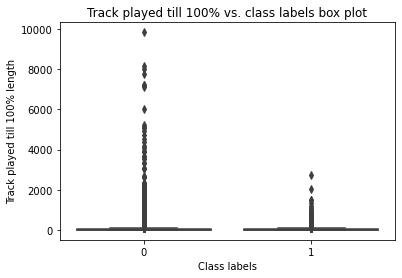

In [114]:
# boxplot
boxplot(train_logs, 'num_100', 'Class labels', 'Track played till 100% length', 'Track played till 100% vs. class labels box plot', col1='is_churn')

**Again lot of outliers present, so removing outliers first.**

In [115]:
# getting 0th to 100th percentiles of track played till 100% of track length
for i in range(0, 110, 10):
    print(i, 'th percentile value is: ', np.nanpercentile(train_logs['num_100'], i))

0 th percentile value is:  0.0
10 th percentile value is:  2.0
20 th percentile value is:  5.0
30 th percentile value is:  8.0
40 th percentile value is:  12.0
50 th percentile value is:  16.0
60 th percentile value is:  22.0
70 th percentile value is:  31.0
80 th percentile value is:  44.0
90 th percentile value is:  74.0
100 th percentile value is:  9838.0


**So 0 to 74 seems as a good range, so beyond this range I can set all the outliers as nan.**

In [116]:
# setting everything to nan beyond limit(0-74)
train_logs['num_100'] = train_logs['num_100'].apply(lambda x: x if (x <= 74.0) else np.nan)

**Getting median for nan imputation.**

In [117]:
# getting median
np.nanmedian(train_logs['num_100'])

14.0

### 3.6.7 User logs dataset (num_unq)-

In [118]:
# number of unique tracks played
x = train_logs['num_unq'].unique()
x = ['{:f}'.format(item) for item in x]
print(x)
print(len(x))

['68.000000', '158.000000', '17.000000', '8.000000', '14.000000', '3.000000', '15.000000', '2.000000', '9.000000', '7.000000', '1.000000', '4.000000', '82.000000', '11.000000', '30.000000', '66.000000', '45.000000', '10.000000', '19.000000', '6.000000', '65.000000', '18.000000', 'nan', '36.000000', '61.000000', '43.000000', '33.000000', '23.000000', '41.000000', '49.000000', '62.000000', '34.000000', '32.000000', '39.000000', '5.000000', '22.000000', '20.000000', '26.000000', '25.000000', '12.000000', '69.000000', '72.000000', '40.000000', '28.000000', '59.000000', '13.000000', '35.000000', '38.000000', '29.000000', '95.000000', '67.000000', '46.000000', '85.000000', '84.000000', '51.000000', '99.000000', '73.000000', '31.000000', '78.000000', '63.000000', '80.000000', '170.000000', '27.000000', '47.000000', '21.000000', '37.000000', '24.000000', '16.000000', '70.000000', '60.000000', '55.000000', '44.000000', '77.000000', '93.000000', '86.000000', '274.000000', '94.000000', '48.000000

**There are 720 unique values present in that feature.**

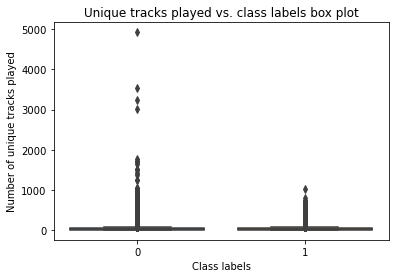

In [119]:
# boxplot
boxplot(train_logs, 'num_unq', 'Class labels', 'Number of unique tracks played', 'Unique tracks played vs. class labels box plot', col1='is_churn')

**Some small values are available, because it's day by day data. Also several outliers, so it's better to remove outliers.**

In [120]:
# getting 0th to 100th percentiles of number of unique tracks played
for i in range(0, 110, 10):
    print(i, 'th percentile value is: ', np.nanpercentile(train_logs['num_unq'], i))

0 th percentile value is:  1.0
10 th percentile value is:  3.0
20 th percentile value is:  6.0
30 th percentile value is:  10.0
40 th percentile value is:  13.0
50 th percentile value is:  18.0
60 th percentile value is:  24.0
70 th percentile value is:  32.0
80 th percentile value is:  44.0
90 th percentile value is:  68.0
100 th percentile value is:  4925.0


**So 0 to 68 seems as a good range, so beyond this range I can set all the outliers as nan.**

In [121]:
# setting everything to nan beyond limit(0-68)
train_logs['num_unq'] = train_logs['num_unq'].apply(lambda x: x if (x <= 68.0) else np.nan)

**Getting median for nan imputation.**

In [122]:
np.nanmedian(train_logs['num_unq'])

16.0

### 3.6.8 User logs dataset (total_secs)-

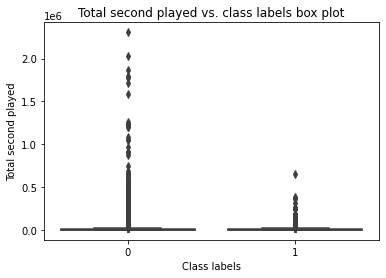

In [123]:
# boxplot
boxplot(train_logs, 'total_secs', 'Class labels', 'Total second played', 'Total second played vs. class labels box plot', col1='is_churn')

**Some small values are available, because it's day by day data. Also several outliers, so it's better to remove outliers.**

In [124]:
# getting 0th to 100th percentiles of number of unique tracks played
for i in range(0, 110, 10):
    print(i, 'th percentile value is: ', np.nanpercentile(train_logs['total_secs'], i))

0 th percentile value is:  0.001
10 th percentile value is:  805.0
20 th percentile value is:  1541.1952
30 th percentile value is:  2366.9677999999994
40 th percentile value is:  3333.8674000000005
50 th percentile value is:  4514.544
60 th percentile value is:  6046.194199999999
70 th percentile value is:  8197.311699999998
80 th percentile value is:  11679.1312
90 th percentile value is:  19167.549700000025
100 th percentile value is:  2307918.066


**So 0 to 19167.549700000025 should be the good range, and beyond this I can set all values as nan.**

In [125]:
# setting everything to nan beyond limit(0-19167.549700000025)
train_logs['total_secs'] = train_logs['total_secs'].apply(lambda x: x if (x <= 19167.549700000025) else np.nan)

**Getting median for nan imputation.**

In [126]:
# getting median
np.nanmedian(train_logs['total_secs'])

3880.765

## Bi-variate Analysis

**Since there are only 8 features, so best way to perform bi-variate analysis is Pair plot. But here I am plotting pair plot for 7 feautes after extracting date features.**

Text(0.5, 1.01, 'Bi-variate analysis across all features')

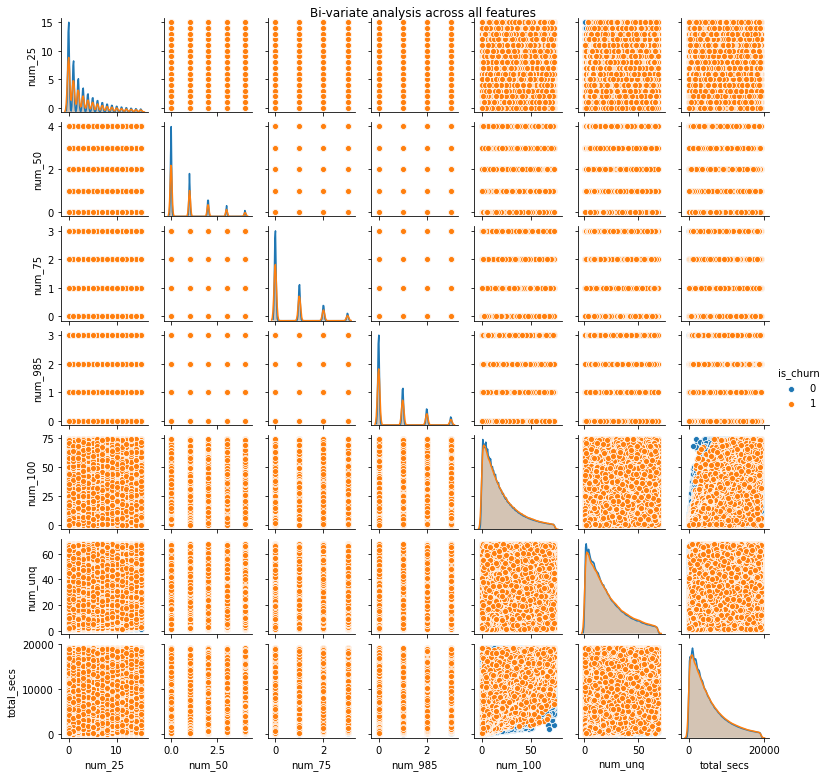

In [127]:
# pair plot
g = sns.pairplot(train_logs, vars=['num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq', 'total_secs'], height=1.5, hue='is_churn')
g.fig.suptitle('Bi-variate analysis across all features', y=1.01)

**A lot of the time there is overlap in between churn and non-churn users. But it may possible because in order to remove outliers I relaced lot of values with nan.**

## 4 Data Preprocessing:
The basic preprocessing that I want to do for this dataset is removal of nan(imputing), removal of outliers, changing datatypes and merging.

### 4.1 Loading files to merge-

In [2]:
# train data
train_data = pd.read_csv('Data/train_v2.csv')
# members data
members_data = pd.read_csv('Data/members_v3.csv')
# transactions data
transactions_data = pd.read_csv('Data/transactions_v2.csv')
# user logs data
logs_data = pd.read_csv('Data/user_logs_v2.csv')
# test data
test_data = pd.read_csv('Data/sample_submission_v2.csv')

### 4.2 Merging files together-

### 4.2.1 For train data-

In [3]:
# merging members data with train data
train_members = pd.merge(train_data, members_data, on='msno', how='left')
# merging transactions data with train members data
train_mem_trans = pd.merge(train_members, transactions_data, on='msno', how='left')
# merging user logs data with train members transaction data
train_dataset = pd.merge(train_mem_trans, logs_data, on='msno', how='left')
# getting head of train dataset
pd.set_option('display.max_columns', 100)
train_dataset.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,20131223.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20170305.0,7.0,0.0,3.0,5.0,71.0,68.0,17599.893
1,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,20131223.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20170301.0,138.0,19.0,7.0,1.0,21.0,158.0,8830.433
2,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,20131223.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20170319.0,0.0,0.0,0.0,0.0,34.0,17.0,7883.313
3,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,20131223.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20170316.0,15.0,0.0,0.0,1.0,38.0,17.0,9029.227
4,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,20131223.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20170310.0,0.0,0.0,0.0,0.0,8.0,8.0,1870.110


In [4]:
# getting shape of train dataset
train_dataset.shape

(16887877, 23)

**So the final train dataset has over 16 million rows and 23 columns(including msno, is_churn).**

In [5]:
# since registration_init_time contains a lot of nan values so impute median date
train_dataset['registration_init_time'] = train_dataset['registration_init_time'].fillna(20150204.0)
# getting registration_init_time array
reg_date = train_dataset['registration_init_time'].values
reg_date

array([20131223., 20131223., 20131223., ..., 20110905., 20110905.,
       20150204.])

In [6]:
len(reg_date)

16887877

In [7]:
# storing these train registrationn dates to npz file
np.savez_compressed('Preprocessed Data/train_registration_date', reg_date)

### 4.2.2 For test data-

In [8]:
# merging members data with test data
test_members = pd.merge(test_data, members_data, on='msno', how='left')
# merging transactions data with test members data
test_mem_trans = pd.merge(test_members, transactions_data, on='msno', how='left')
# merging user logs data with test members transaction data
test_dataset = pd.merge(test_mem_trans, logs_data, on='msno', how='left')
# getting head of test dataset
pd.set_option('display.max_columns', 100)
test_dataset.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,4n+fXlyJvfQnTeKXTWT507Ll4JVYGrOC8LHCfwBmPE4=,0,1.0,0.0,NaN,7.0,20150718.0,41.0,30.0,99.0,99.0,1.0,20170318.0,20170418.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=,0,4.0,28.0,male,9.0,20051030.0,34.0,30.0,149.0,149.0,1.0,20170331.0,20170430.0,0.0,20170308.0,18.0,4.0,7.0,5.0,117.0,129.0,32699.940
2,aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=,0,4.0,28.0,male,9.0,20051030.0,34.0,30.0,149.0,149.0,1.0,20170331.0,20170430.0,0.0,20170319.0,21.0,2.0,3.0,4.0,34.0,57.0,10333.911
3,aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=,0,4.0,28.0,male,9.0,20051030.0,34.0,30.0,149.0,149.0,1.0,20170331.0,20170430.0,0.0,20170301.0,15.0,2.0,6.0,6.0,112.0,120.0,30488.489
4,aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=,0,4.0,28.0,male,9.0,20051030.0,34.0,30.0,149.0,149.0,1.0,20170331.0,20170430.0,0.0,20170307.0,3.0,2.0,0.0,1.0,13.0,16.0,3826.011


In [9]:
# getting shape of the test dataset
test_dataset.shape

(13745932, 23)

**Test dataset is also fairly large, which contain more than 13 million rows with 23 columns(including msno and is_churn).**

In [10]:
# since registration_init_time contains a lot of nan values so impute median date
test_dataset['registration_init_time'] = test_dataset['registration_init_time'].fillna(20150204.0)
# getting registration_init_time array
reg_date = test_dataset['registration_init_time'].values
reg_date

array([20150718., 20051030., 20051030., ..., 20130820., 20130820.,
       20130820.])

In [11]:
len(reg_date)

13745932

In [12]:
# storing these test registration dates to npz file
np.savez_compressed('Preprocessed Data/test_registration_date', reg_date)

### 4.3 Preprocessing-

In [13]:
def preprocess(data):
    '''This preprocess function is used to perform basic preprocessing on top of train and test dataset
    These preprocessing consist outliers removal, nan imputation and replacing the values'''
    
    # imputing 0 in place of nan values in the city column
    data['city'] = data['city'].fillna(0)

    # removing outliers
    data['bd'] = data['bd'].apply(lambda x: x if (x < 72.0) and (x > 0.0) else np.nan)
    # imputing 28 as age instead of nan
    data['bd'] = data['bd'].fillna(28.0)

    # replacing male with 1 in gender
    data['gender'] = data['gender'].replace(to_replace='male', value=1)
    # replacing male with 2 in gender
    data['gender'] = data['gender'].replace(to_replace='female', value=2)
    # replacing nan with 0 in gender
    data['gender'] = data['gender'].fillna(0)

    # replace 0 instead of nan in registered_via
    data['registered_via'] = data['registered_via'].fillna(0)

    # filling median date in place of nan in the df
    data['registration_init_time'] = data['registration_init_time'].fillna(20150204.0)
    # converting float date to datetime
    data['registration_init_time'] = pd.to_datetime(data['registration_init_time'], format='%Y%m%d')

    # imputing 0 in place of nan value in payment_method_id
    data['payment_method_id'] = data['payment_method_id'].fillna(0)

    # removing outliers
    data['payment_plan_days'] = data['payment_plan_days'].apply(lambda x: x if (x <= 30.0) else np.nan)
    # imputing 30 in place of nan in payment_plan_days
    data['payment_plan_days'] = data['payment_plan_days'].fillna(30.0)

    # removing outliers
    data['plan_list_price'] = data['plan_list_price'].apply(lambda x: x if (x <= 180.0) else np.nan)
    # imputing 149 in place of nan in plan_list_price
    data['plan_list_price'] = data['plan_list_price'].fillna(149.0)

    # removing outliers
    data['actual_amount_paid'] = data['actual_amount_paid'].apply(lambda x: x if (x <= 180.0) else np.nan)
    # imputing 149 in place of nan in actual_amount_paid
    data['actual_amount_paid'] = data['actual_amount_paid'].fillna(149.0)

    # imputing 2 in place of nan values in is_auto_renew
    data['is_auto_renew'] = data['is_auto_renew'].fillna(2)

    # filling median date in place of nan in the df
    data['transaction_date'] = data['transaction_date'].fillna(20170316.0)
    # converting float date to datetime
    data['transaction_date'] = pd.to_datetime(data['transaction_date'], format='%Y%m%d')

    # filling median date in place of nan in the df
    data['membership_expire_date'] = data['membership_expire_date'].fillna(20170419.0)
    # converting float date to datetime
    data['membership_expire_date'] = pd.to_datetime(data['membership_expire_date'], format='%Y%m%d')

    # imputing 2 in place of nan values in is_cancel
    data['is_cancel'] = data['is_cancel'].fillna(2)

    # filling median date in place of nan in the df
    data['date'] = data['date'].fillna(20170316.0)
    # converting float date to datetime
    data['date'] = pd.to_datetime(data['date'], format='%Y%m%d')

    # removing outliers
    data['num_25'] = data['num_25'].apply(lambda x: x if (x <= 15.0) else np.nan)
    # now I can impute 2 instead of nan in num_25
    data['num_25'] = data['num_25'].fillna(2.0)

    # removing outliers
    data['num_50'] = data['num_50'].apply(lambda x: x if (x <= 4.0) else np.nan)
    # now I can impute 0 instead of nan in num_50
    data['num_50'] = data['num_50'].fillna(0)

    # removing outliers
    data['num_75'] = data['num_75'].apply(lambda x: x if (x <= 3.0) else np.nan)
    # now I can impute 0 instead of nan in num_75
    data['num_75'] = data['num_75'].fillna(0)

    # removing outliers
    data['num_985'] = data['num_985'].apply(lambda x: x if (x <= 3.0) else np.nan)
    # now I can impute 0 instead of nan in num_985
    data['num_985'] = data['num_985'].fillna(0)

    # removing outliers
    data['num_100'] = data['num_100'].apply(lambda x: x if (x <= 74.0) else np.nan)
    # now I can impute 14 instead of nan in num_100
    data['num_100'] = data['num_100'].fillna(14.0)

    # removing outliers
    data['num_unq'] = data['num_unq'].apply(lambda x: x if (x <= 68.0) else np.nan)
    # now I can impute 16 instead of nan in num_unq
    data['num_unq'] = data['num_unq'].fillna(16.0)

    # removing outliers
    data['total_secs'] = data['total_secs'].apply(lambda x: x if (x <= 19167.549700000025) else np.nan)
    # now I can impute 3880.765 instead of nan in total_secs
    data['total_secs'] = data['total_secs'].fillna(3880.765)

### 4.3.1 For train data-

In [14]:
# Checking null values for train data
# getting features wise null values (number)
train_dataset.isnull().sum()

msno                            0
is_churn                        0
city                       117166
bd                         117166
gender                    7860346
registered_via             117166
registration_init_time          0
payment_method_id          340641
payment_plan_days          340641
plan_list_price            340641
actual_amount_paid         340641
is_auto_renew              340641
transaction_date           340641
membership_expire_date     340641
is_cancel                  340641
date                       249615
num_25                     249615
num_50                     249615
num_75                     249615
num_985                    249615
num_100                    249615
num_unq                    249615
total_secs                 249615
dtype: int64

In [15]:
# performing preprocessing on top of entire train data
preprocess(train_dataset)

In [16]:
# again just to cross check if there is any null or not
train_dataset.isnull().values.any()

False

In [17]:
# checking for any duplicate row
train_dataset.duplicated().any()

False

**So there are no null values and no duplicates remaining, now I can store this dataframe as train dataframe.**

In [18]:
# saving train file to disk
train_dataset.to_csv('Preprocessed Data/train.csv', index=False)

### 4.3.2 For test data-

In [19]:
# Checking null values for test data
# getting features wise null values (number)
test_dataset.isnull().sum()

msno                            0
is_churn                        0
city                       114011
bd                         114011
gender                    7436258
registered_via             114011
registration_init_time          0
payment_method_id              10
payment_plan_days              10
plan_list_price                10
actual_amount_paid             10
is_auto_renew                  10
transaction_date               10
membership_expire_date         10
is_cancel                      10
date                       212724
num_25                     212724
num_50                     212724
num_75                     212724
num_985                    212724
num_100                    212724
num_unq                    212724
total_secs                 212724
dtype: int64

In [20]:
# performing preprocessing on top of entire test data
preprocess(test_dataset)

In [21]:
# again just to cross check if there is any null or not
test_dataset.isnull().values.any()

False

In [22]:
# checking for any duplicate row
test_dataset.duplicated().any()

False

**So there are no null values and no duplicates remaining, now I can store this dataframe as train dataframe.**

In [23]:
# saving test file to disk
test_dataset.to_csv('Preprocessed Data/test.csv', index=False)

## Summary

Highlight of the EDA is following: -

**1. There are no null values, after preprocessing.**

**2. There are no duplicate values, after preprocessing.**

**3. There are 7 categorical feature. So at feature engineering I can apply either 'one hot encoding' or keeping them as it is.**

**4. 'Gender' feature contains the maximum nan values.**

**5. 'bd' (age) feature contains a lot of outliers, so after analysing the data I cut out it's lower threshold as 0(not reasonable) and upper threshold as 72.**

**6. 'num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq', 'total_secs' contains a lot of outliers, so again by anal ng them I set them with the reasonable values.**

**7. The imputation operations that I tried here are, median based, and zero based imputations(creating new category).**

**8. The final dataset is very large, which contain 16887877 rows and 23 columns. With the size of 2.91 GB.**

**9. The test dataset is itself very large, and it contain 13745932 rows and 23 columns. With the size of 2.36 GB.**